In [60]:
import sys

sys.path.insert(0, '../Lab/')
sys.path.insert(0, '../New_Hybrids/')
from KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
from KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from KNN.UserKNNCFRecommender import UserKNNCFRecommender
from UserIcmKNNCFRecommender import UserIcmKNNCFRecommender
from ItemIcmKNNCFRecommender import ItemIcmKNNCFRecommender
from WeightedHybrid import WeightedHybrid
from WeightedHybridV2 import WeightedHybridScoreRecommender
from WeightedListHybrid import WeightedListHybrid
from SLIM_BPR.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from GraphBased.P3alphaRecommender import P3alphaRecommender

import matplotlib
import matplotlib.pyplot as plt
from Base.Similarity.Compute_Similarity_Python import Compute_Similarity_Python

%matplotlib inline 

import numpy as np

In [61]:
sys.path.insert(0, '../datasets/')
from load_tables import load_ICM_csr, load_URM_csr
ICM_all = load_ICM_csr()
URM_all = load_URM_csr()

In [62]:
from Base.Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

In [63]:
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.70)
evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])

In [64]:

recs = [
ItemKNNCFRecommender,
UserKNNCFRecommender,
SLIM_BPR_Cython,
UserIcmKNNCFRecommender,
ItemIcmKNNCFRecommender,
P3alphaRecommender
]

only_URM = {
    "URM_train" : URM_train
}

cython = {
    "URM_train" : URM_train,
    "recompile_cython" : False,
    "verbose" : False
}

also_ICM = {
    "URM_train" : URM_train,
    "ICM" : ICM_all
}



inits = [
    only_URM,only_URM,cython,also_ICM,also_ICM, only_URM
]


userknn = {}
userknn["topK"] = 102
userknn["shrink"] = 1

itemknn = {}
itemknn["topK"] = 141
itemknn["shrink"] = 47

cy = {}
cy["epochs"] = 1904
cy["topK"] = 881
cy["positive_threshold_BPR"] = 0.9765
cy["learning_rate"] = 0.0002
cy["batch_size"] = 10
cy["sgd_mode"] = "sdg"

uicm = {}
uicm["topK"] = 246
uicm["shrink"] = 0
uicm["normalize"] = True

iicm = {}
iicm["topK"] = 893
iicm["shrink"] = 2
iicm["normalize"] = True

alpha = {}
alpha["alpha"] = 0.547615508822564
alpha["topK"] = 500

fits = [userknn,itemknn, cy, uicm, iicm, alpha]

# FIND FIRST 2 WEIGHTS

In [15]:
recs = [
ItemKNNCFRecommender,
UserKNNCFRecommender,
]

inits = [
    only_URM,only_URM
]

fits = [userknn,itemknn]

trials = [700,800,900,1000,1100,1200,1300,1500,1600,1700]



In [16]:
best_t = -1
MAPS = []
best_MAP = 0
recommender = WeightedHybridScoreRecommender(URM_train, recs, inits)
for t in trials:
    weights = [1,t]
    recommender.fit(fits,weights)

    result_dict, _ = evaluator_validation.evaluateRecommender(recommender)

    MAP = result_dict[10]["MAP"]
    print(f"t:{t} -> MAP:{MAP}")
    
    MAPS.append(MAP)
    
    if MAP > best_MAP:
        best_MAP = MAP
        best_t = t
        
print(f"BEST T:{best_t} -> BEST MAP:{best_MAP}")


WeightedHybridScoreRecommender: URM Detected 151 (1.90 %) cold users.
WeightedHybridScoreRecommender: URM Detected 3289 (12.66 %) cold items.
ItemKNNCFRecommender: URM Detected 151 (1.90 %) cold users.
ItemKNNCFRecommender: URM Detected 3289 (12.66 %) cold items.
UserKNNCFRecommender: URM Detected 151 (1.90 %) cold users.
UserKNNCFRecommender: URM Detected 3289 (12.66 %) cold items.
--------FITTING IN PROGRESS...-------
Similarity column 25975 ( 100 % ), 4673.14 column/sec, elapsed time 0.09 min
Similarity column 7947 ( 100 % ), 13180.15 column/sec, elapsed time 0.01 min
------FITTING END, SIAMO GROSSISSIMI ------
EvaluatorHoldout: Processed 6526 ( 100.00% ) in 10.66 sec. Users per second: 612
t:700 -> MAP:0.05255933547724712
--------FITTING IN PROGRESS...-------
Similarity column 25975 ( 100 % ), 4991.06 column/sec, elapsed time 0.09 min
Similarity column 7947 ( 100 % ), 12530.79 column/sec, elapsed time 0.01 min
------FITTING END, SIAMO GROSSISSIMI ------
EvaluatorHoldout: Processed 

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

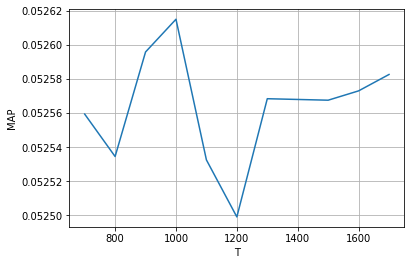

In [17]:
fig, ax = plt.subplots()
ax.plot(trials, MAPS)

ax.set(xlabel='T', ylabel='MAP')
ax.grid()
plt.show()


In [65]:
w1 = 1000

# ADD 1 RECOMMENDER

In [28]:
recs = [
ItemKNNCFRecommender,
UserKNNCFRecommender,
UserIcmKNNCFRecommender
]

inits = [
    only_URM,only_URM,also_ICM
]

fits = [userknn,itemknn, uicm]

trials = [63,64,65,66,67,68]

In [29]:
best_t = -1
MAPS = []
best_MAP = 0
recommender = WeightedHybridScoreRecommender(URM_train, recs, inits)
for t in trials:
    weights = [1,w1,t]
    recommender.fit(fits,weights)

    result_dict, _ = evaluator_validation.evaluateRecommender(recommender)

    MAP = result_dict[10]["MAP"]
    print(f"t:{t} -> MAP:{MAP}")
    
    MAPS.append(MAP)
    
    if MAP > best_MAP:
        best_MAP = MAP
        best_t = t
        
print(f"BEST T:{best_t} -> BEST MAP:{best_MAP}")

WeightedHybridScoreRecommender: URM Detected 151 (1.90 %) cold users.
WeightedHybridScoreRecommender: URM Detected 3289 (12.66 %) cold items.
ItemKNNCFRecommender: URM Detected 151 (1.90 %) cold users.
ItemKNNCFRecommender: URM Detected 3289 (12.66 %) cold items.
UserKNNCFRecommender: URM Detected 151 (1.90 %) cold users.
UserKNNCFRecommender: URM Detected 3289 (12.66 %) cold items.
UserKNNCFRecommender: URM Detected 151 (1.90 %) cold users.
UserKNNCFRecommender: URM Detected 3289 (12.66 %) cold items.
UserKNNCFRecommender: URM Detected 151 (1.90 %) cold users.
UserKNNCFRecommender: URM Detected 63 (0.32 %) cold items.
--------FITTING IN PROGRESS...-------
Similarity column 25975 ( 100 % ), 5193.34 column/sec, elapsed time 0.08 min
Similarity column 7947 ( 100 % ), 12888.94 column/sec, elapsed time 0.01 min
Similarity column 7947 ( 100 % ), 13782.97 column/sec, elapsed time 0.01 min
Similarity column 7947 ( 100 % ), 2639.36 column/sec, elapsed time 0.05 min
------FITTING END, SIAMO GRO

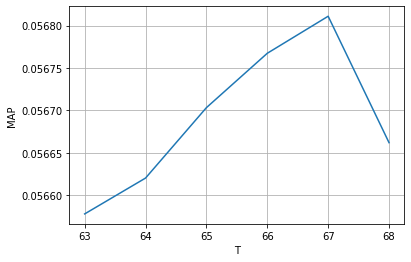

In [31]:


fig, ax = plt.subplots()
ax.plot(trials, MAPS)

ax.set(xlabel='T', ylabel='MAP')
ax.grid()
plt.show()

In [66]:
w2 = 67

# ADD 1 RECOMMENDER


In [73]:
recs = [
ItemKNNCFRecommender,
UserKNNCFRecommender,
UserIcmKNNCFRecommender,
ItemIcmKNNCFRecommender
]

inits = [
    only_URM,only_URM,also_ICM, also_ICM
]

fits = [userknn,itemknn, uicm, iicm]

trials = [205,210,220,250,300]

In [74]:
best_t = -1
MAPS = []
best_MAP = 0
recommender = WeightedHybridScoreRecommender(URM_train, recs, inits)
for t in trials:
    weights = [1,w1,w2,t]
    recommender.fit(fits,weights)

    result_dict, _ = evaluator_validation.evaluateRecommender(recommender)

    MAP = result_dict[10]["MAP"]
    print(f"t:{t} -> MAP:{MAP}")
    
    MAPS.append(MAP)
    
    if MAP > best_MAP:
        best_MAP = MAP
        best_t = t
        
print(f"BEST T:{best_t} -> BEST MAP:{best_MAP}")

WeightedHybridScoreRecommender: URM Detected 152 (1.91 %) cold users.
WeightedHybridScoreRecommender: URM Detected 3329 (12.82 %) cold items.
ItemKNNCFRecommender: URM Detected 152 (1.91 %) cold users.
ItemKNNCFRecommender: URM Detected 3329 (12.82 %) cold items.
UserKNNCFRecommender: URM Detected 152 (1.91 %) cold users.
UserKNNCFRecommender: URM Detected 3329 (12.82 %) cold items.
UserKNNCFRecommender: URM Detected 152 (1.91 %) cold users.
UserKNNCFRecommender: URM Detected 3329 (12.82 %) cold items.
UserKNNCFRecommender: URM Detected 152 (1.91 %) cold users.
UserKNNCFRecommender: URM Detected 73 (0.36 %) cold items.
ItemKNNCFRecommender: URM Detected 152 (1.91 %) cold users.
ItemKNNCFRecommender: URM Detected 3329 (12.82 %) cold items.
ItemKNNCFRecommender: URM Detected 2 (0.01 %) cold users.
ItemKNNCFRecommender: URM Detected 25 (0.10 %) cold items.
--------FITTING IN PROGRESS...-------
Similarity column 25975 ( 100 % ), 4728.77 column/sec, elapsed time 0.09 min
Similarity column 7

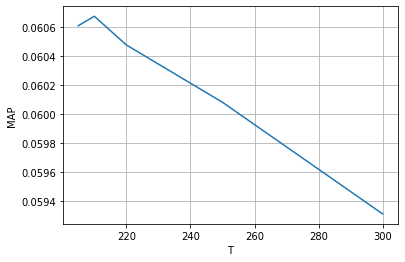

In [75]:
fig, ax = plt.subplots()
ax.plot(trials, MAPS)

ax.set(xlabel='T', ylabel='MAP')
ax.grid()
plt.show()

In [76]:
w3 = 205

# ADD 1 RECOMMENDER

In [83]:
recs = [
ItemKNNCFRecommender,
UserKNNCFRecommender,
UserIcmKNNCFRecommender,
ItemIcmKNNCFRecommender,
P3alphaRecommender
]

inits = [
    only_URM,only_URM,also_ICM, also_ICM, only_URM
]

fits = [userknn,itemknn, uicm, iicm,alpha]

trials = [350,375,400,425,450]

In [84]:
best_t = -1
MAPS = []
best_MAP = 0
recommender = WeightedHybridScoreRecommender(URM_train, recs, inits)
for t in trials:
    weights = [1,w1,w2,w3,t]
    recommender.fit(fits,weights)

    result_dict, _ = evaluator_validation.evaluateRecommender(recommender)

    MAP = result_dict[10]["MAP"]
    print(f"t:{t} -> MAP:{MAP}")
    
    MAPS.append(MAP)
    
    if MAP > best_MAP:
        best_MAP = MAP
        best_t = t
        
print(f"BEST T:{best_t} -> BEST MAP:{best_MAP}")

WeightedHybridScoreRecommender: URM Detected 152 (1.91 %) cold users.
WeightedHybridScoreRecommender: URM Detected 3329 (12.82 %) cold items.
ItemKNNCFRecommender: URM Detected 152 (1.91 %) cold users.
ItemKNNCFRecommender: URM Detected 3329 (12.82 %) cold items.
UserKNNCFRecommender: URM Detected 152 (1.91 %) cold users.
UserKNNCFRecommender: URM Detected 3329 (12.82 %) cold items.
UserKNNCFRecommender: URM Detected 152 (1.91 %) cold users.
UserKNNCFRecommender: URM Detected 3329 (12.82 %) cold items.
UserKNNCFRecommender: URM Detected 152 (1.91 %) cold users.
UserKNNCFRecommender: URM Detected 73 (0.36 %) cold items.
ItemKNNCFRecommender: URM Detected 152 (1.91 %) cold users.
ItemKNNCFRecommender: URM Detected 3329 (12.82 %) cold items.
ItemKNNCFRecommender: URM Detected 2 (0.01 %) cold users.
ItemKNNCFRecommender: URM Detected 25 (0.10 %) cold items.
P3alphaRecommender: URM Detected 152 (1.91 %) cold users.
P3alphaRecommender: URM Detected 3329 (12.82 %) cold items.
--------FITTING 

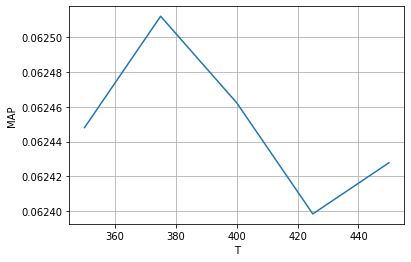

In [85]:
fig, ax = plt.subplots()
ax.plot(trials, MAPS)

ax.set(xlabel='T', ylabel='MAP')
ax.grid()
plt.show()

In [86]:
w4 = 375

# ADD 1 RECOMMENDER

In [94]:
recs = [
ItemKNNCFRecommender,
UserKNNCFRecommender,
UserIcmKNNCFRecommender,
ItemIcmKNNCFRecommender,
P3alphaRecommender,
SLIM_BPR_Cython
]

inits = [
    only_URM,only_URM,also_ICM, also_ICM, only_URM, cython
]

fits = [userknn,itemknn, uicm, iicm,alpha, cy]

trials = [14,14.5,15.5,16,17]

In [95]:
best_t = -1
MAPS = []
best_MAP = 0
recommender = WeightedHybridScoreRecommender(URM_train, recs, inits)
for t in trials:
    weights = [1,w1,w2,w3,w4,t]
    recommender.fit(fits,weights)

    result_dict, _ = evaluator_validation.evaluateRecommender(recommender)

    MAP = result_dict[10]["MAP"]
    print(f"t:{t} -> MAP:{MAP}")
    
    MAPS.append(MAP)
    
    if MAP > best_MAP:
        best_MAP = MAP
        best_t = t
        
print(f"BEST T:{best_t} -> BEST MAP:{best_MAP}")

WeightedHybridScoreRecommender: URM Detected 152 (1.91 %) cold users.
WeightedHybridScoreRecommender: URM Detected 3329 (12.82 %) cold items.
ItemKNNCFRecommender: URM Detected 152 (1.91 %) cold users.
ItemKNNCFRecommender: URM Detected 3329 (12.82 %) cold items.
UserKNNCFRecommender: URM Detected 152 (1.91 %) cold users.
UserKNNCFRecommender: URM Detected 3329 (12.82 %) cold items.
UserKNNCFRecommender: URM Detected 152 (1.91 %) cold users.
UserKNNCFRecommender: URM Detected 3329 (12.82 %) cold items.
UserKNNCFRecommender: URM Detected 152 (1.91 %) cold users.
UserKNNCFRecommender: URM Detected 73 (0.36 %) cold items.
ItemKNNCFRecommender: URM Detected 152 (1.91 %) cold users.
ItemKNNCFRecommender: URM Detected 3329 (12.82 %) cold items.
ItemKNNCFRecommender: URM Detected 2 (0.01 %) cold users.
ItemKNNCFRecommender: URM Detected 25 (0.10 %) cold items.
P3alphaRecommender: URM Detected 152 (1.91 %) cold users.
P3alphaRecommender: URM Detected 3329 (12.82 %) cold items.
Deallocating Cyt

SLIM_BPR_Recommender: Epoch 108 of 1904. Elapsed time 4.74 sec
SLIM_BPR_Recommender: Epoch 109 of 1904. Elapsed time 4.76 sec
SLIM_BPR_Recommender: Epoch 110 of 1904. Elapsed time 4.78 sec
SLIM_BPR_Recommender: Epoch 111 of 1904. Elapsed time 4.80 sec
SLIM_BPR_Recommender: Epoch 112 of 1904. Elapsed time 4.82 sec
SLIM_BPR_Recommender: Epoch 113 of 1904. Elapsed time 4.85 sec
SLIM_BPR_Recommender: Epoch 114 of 1904. Elapsed time 4.87 sec
SLIM_BPR_Recommender: Epoch 115 of 1904. Elapsed time 4.89 sec
SLIM_BPR_Recommender: Epoch 116 of 1904. Elapsed time 4.91 sec
SLIM_BPR_Recommender: Epoch 117 of 1904. Elapsed time 4.93 sec
SLIM_BPR_Recommender: Epoch 118 of 1904. Elapsed time 4.95 sec
SLIM_BPR_Recommender: Epoch 119 of 1904. Elapsed time 4.97 sec
SLIM_BPR_Recommender: Epoch 120 of 1904. Elapsed time 4.99 sec
SLIM_BPR_Recommender: Epoch 121 of 1904. Elapsed time 5.01 sec
SLIM_BPR_Recommender: Epoch 122 of 1904. Elapsed time 5.03 sec
SLIM_BPR_Recommender: Epoch 123 of 1904. Elapsed time 5

SLIM_BPR_Recommender: Epoch 238 of 1904. Elapsed time 12.13 sec
SLIM_BPR_Recommender: Epoch 239 of 1904. Elapsed time 12.16 sec
SLIM_BPR_Recommender: Epoch 240 of 1904. Elapsed time 12.20 sec
SLIM_BPR_Recommender: Epoch 241 of 1904. Elapsed time 12.23 sec
SLIM_BPR_Recommender: Epoch 242 of 1904. Elapsed time 12.28 sec
SLIM_BPR_Recommender: Epoch 243 of 1904. Elapsed time 12.31 sec
SLIM_BPR_Recommender: Epoch 244 of 1904. Elapsed time 12.34 sec
SLIM_BPR_Recommender: Epoch 245 of 1904. Elapsed time 12.38 sec
SLIM_BPR_Recommender: Epoch 246 of 1904. Elapsed time 12.44 sec
SLIM_BPR_Recommender: Epoch 247 of 1904. Elapsed time 12.49 sec
SLIM_BPR_Recommender: Epoch 248 of 1904. Elapsed time 12.56 sec
SLIM_BPR_Recommender: Epoch 249 of 1904. Elapsed time 12.61 sec
SLIM_BPR_Recommender: Epoch 250 of 1904. Elapsed time 12.67 sec
SLIM_BPR_Recommender: Epoch 251 of 1904. Elapsed time 12.71 sec
SLIM_BPR_Recommender: Epoch 252 of 1904. Elapsed time 12.77 sec
SLIM_BPR_Recommender: Epoch 253 of 1904.

SLIM_BPR_Recommender: Epoch 367 of 1904. Elapsed time 21.53 sec
SLIM_BPR_Recommender: Epoch 368 of 1904. Elapsed time 21.58 sec
SLIM_BPR_Recommender: Epoch 369 of 1904. Elapsed time 21.63 sec
SLIM_BPR_Recommender: Epoch 370 of 1904. Elapsed time 21.74 sec
SLIM_BPR_Recommender: Epoch 371 of 1904. Elapsed time 21.93 sec
SLIM_BPR_Recommender: Epoch 372 of 1904. Elapsed time 21.96 sec
SLIM_BPR_Recommender: Epoch 373 of 1904. Elapsed time 21.99 sec
SLIM_BPR_Recommender: Epoch 374 of 1904. Elapsed time 22.03 sec
SLIM_BPR_Recommender: Epoch 375 of 1904. Elapsed time 22.11 sec
SLIM_BPR_Recommender: Epoch 376 of 1904. Elapsed time 22.18 sec
SLIM_BPR_Recommender: Epoch 377 of 1904. Elapsed time 22.21 sec
SLIM_BPR_Recommender: Epoch 378 of 1904. Elapsed time 22.25 sec
SLIM_BPR_Recommender: Epoch 379 of 1904. Elapsed time 22.29 sec
SLIM_BPR_Recommender: Epoch 380 of 1904. Elapsed time 22.39 sec
SLIM_BPR_Recommender: Epoch 381 of 1904. Elapsed time 22.51 sec
SLIM_BPR_Recommender: Epoch 382 of 1904.

SLIM_BPR_Recommender: Epoch 496 of 1904. Elapsed time 30.16 sec
SLIM_BPR_Recommender: Epoch 497 of 1904. Elapsed time 30.19 sec
SLIM_BPR_Recommender: Epoch 498 of 1904. Elapsed time 30.23 sec
SLIM_BPR_Recommender: Epoch 499 of 1904. Elapsed time 30.27 sec
SLIM_BPR_Recommender: Epoch 500 of 1904. Elapsed time 30.30 sec
SLIM_BPR_Recommender: Epoch 501 of 1904. Elapsed time 30.33 sec
SLIM_BPR_Recommender: Epoch 502 of 1904. Elapsed time 30.37 sec
SLIM_BPR_Recommender: Epoch 503 of 1904. Elapsed time 30.41 sec
SLIM_BPR_Recommender: Epoch 504 of 1904. Elapsed time 30.46 sec
SLIM_BPR_Recommender: Epoch 505 of 1904. Elapsed time 30.49 sec
SLIM_BPR_Recommender: Epoch 506 of 1904. Elapsed time 30.52 sec
SLIM_BPR_Recommender: Epoch 507 of 1904. Elapsed time 30.55 sec
SLIM_BPR_Recommender: Epoch 508 of 1904. Elapsed time 30.58 sec
SLIM_BPR_Recommender: Epoch 509 of 1904. Elapsed time 30.62 sec
SLIM_BPR_Recommender: Epoch 510 of 1904. Elapsed time 30.64 sec
SLIM_BPR_Recommender: Epoch 511 of 1904.

SLIM_BPR_Recommender: Epoch 625 of 1904. Elapsed time 33.38 sec
SLIM_BPR_Recommender: Epoch 626 of 1904. Elapsed time 33.40 sec
SLIM_BPR_Recommender: Epoch 627 of 1904. Elapsed time 33.42 sec
SLIM_BPR_Recommender: Epoch 628 of 1904. Elapsed time 33.44 sec
SLIM_BPR_Recommender: Epoch 629 of 1904. Elapsed time 33.48 sec
SLIM_BPR_Recommender: Epoch 630 of 1904. Elapsed time 33.51 sec
SLIM_BPR_Recommender: Epoch 631 of 1904. Elapsed time 33.55 sec
SLIM_BPR_Recommender: Epoch 632 of 1904. Elapsed time 33.58 sec
SLIM_BPR_Recommender: Epoch 633 of 1904. Elapsed time 33.62 sec
SLIM_BPR_Recommender: Epoch 634 of 1904. Elapsed time 33.64 sec
SLIM_BPR_Recommender: Epoch 635 of 1904. Elapsed time 33.67 sec
SLIM_BPR_Recommender: Epoch 636 of 1904. Elapsed time 33.70 sec
SLIM_BPR_Recommender: Epoch 637 of 1904. Elapsed time 33.72 sec
SLIM_BPR_Recommender: Epoch 638 of 1904. Elapsed time 33.76 sec
SLIM_BPR_Recommender: Epoch 639 of 1904. Elapsed time 33.78 sec
SLIM_BPR_Recommender: Epoch 640 of 1904.

SLIM_BPR_Recommender: Epoch 754 of 1904. Elapsed time 43.27 sec
SLIM_BPR_Recommender: Epoch 755 of 1904. Elapsed time 43.35 sec
SLIM_BPR_Recommender: Epoch 756 of 1904. Elapsed time 43.42 sec
SLIM_BPR_Recommender: Epoch 757 of 1904. Elapsed time 43.51 sec
SLIM_BPR_Recommender: Epoch 758 of 1904. Elapsed time 43.61 sec
SLIM_BPR_Recommender: Epoch 759 of 1904. Elapsed time 43.68 sec
SLIM_BPR_Recommender: Epoch 760 of 1904. Elapsed time 43.77 sec
SLIM_BPR_Recommender: Epoch 761 of 1904. Elapsed time 43.82 sec
SLIM_BPR_Recommender: Epoch 762 of 1904. Elapsed time 43.87 sec
SLIM_BPR_Recommender: Epoch 763 of 1904. Elapsed time 43.92 sec
SLIM_BPR_Recommender: Epoch 764 of 1904. Elapsed time 43.96 sec
SLIM_BPR_Recommender: Epoch 765 of 1904. Elapsed time 44.01 sec
SLIM_BPR_Recommender: Epoch 766 of 1904. Elapsed time 44.05 sec
SLIM_BPR_Recommender: Epoch 767 of 1904. Elapsed time 44.09 sec
SLIM_BPR_Recommender: Epoch 768 of 1904. Elapsed time 44.13 sec
SLIM_BPR_Recommender: Epoch 769 of 1904.

SLIM_BPR_Recommender: Epoch 883 of 1904. Elapsed time 47.62 sec
SLIM_BPR_Recommender: Epoch 884 of 1904. Elapsed time 47.65 sec
SLIM_BPR_Recommender: Epoch 885 of 1904. Elapsed time 47.68 sec
SLIM_BPR_Recommender: Epoch 886 of 1904. Elapsed time 47.70 sec
SLIM_BPR_Recommender: Epoch 887 of 1904. Elapsed time 47.72 sec
SLIM_BPR_Recommender: Epoch 888 of 1904. Elapsed time 47.75 sec
SLIM_BPR_Recommender: Epoch 889 of 1904. Elapsed time 47.78 sec
SLIM_BPR_Recommender: Epoch 890 of 1904. Elapsed time 47.82 sec
SLIM_BPR_Recommender: Epoch 891 of 1904. Elapsed time 47.85 sec
SLIM_BPR_Recommender: Epoch 892 of 1904. Elapsed time 47.88 sec
SLIM_BPR_Recommender: Epoch 893 of 1904. Elapsed time 47.91 sec
SLIM_BPR_Recommender: Epoch 894 of 1904. Elapsed time 47.93 sec
SLIM_BPR_Recommender: Epoch 895 of 1904. Elapsed time 47.97 sec
SLIM_BPR_Recommender: Epoch 896 of 1904. Elapsed time 47.99 sec
SLIM_BPR_Recommender: Epoch 897 of 1904. Elapsed time 48.02 sec
SLIM_BPR_Recommender: Epoch 898 of 1904.

SLIM_BPR_Recommender: Epoch 1011 of 1904. Elapsed time 51.85 sec
SLIM_BPR_Recommender: Epoch 1012 of 1904. Elapsed time 51.88 sec
SLIM_BPR_Recommender: Epoch 1013 of 1904. Elapsed time 51.91 sec
SLIM_BPR_Recommender: Epoch 1014 of 1904. Elapsed time 51.94 sec
SLIM_BPR_Recommender: Epoch 1015 of 1904. Elapsed time 51.96 sec
SLIM_BPR_Recommender: Epoch 1016 of 1904. Elapsed time 51.99 sec
SLIM_BPR_Recommender: Epoch 1017 of 1904. Elapsed time 52.01 sec
SLIM_BPR_Recommender: Epoch 1018 of 1904. Elapsed time 52.04 sec
SLIM_BPR_Recommender: Epoch 1019 of 1904. Elapsed time 52.07 sec
SLIM_BPR_Recommender: Epoch 1020 of 1904. Elapsed time 52.09 sec
SLIM_BPR_Recommender: Epoch 1021 of 1904. Elapsed time 52.12 sec
SLIM_BPR_Recommender: Epoch 1022 of 1904. Elapsed time 52.14 sec
SLIM_BPR_Recommender: Epoch 1023 of 1904. Elapsed time 52.17 sec
SLIM_BPR_Recommender: Epoch 1024 of 1904. Elapsed time 52.20 sec
SLIM_BPR_Recommender: Epoch 1025 of 1904. Elapsed time 52.22 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1138 of 1904. Elapsed time 55.22 sec
SLIM_BPR_Recommender: Epoch 1139 of 1904. Elapsed time 55.24 sec
SLIM_BPR_Recommender: Epoch 1140 of 1904. Elapsed time 55.28 sec
SLIM_BPR_Recommender: Epoch 1141 of 1904. Elapsed time 55.31 sec
SLIM_BPR_Recommender: Epoch 1142 of 1904. Elapsed time 55.34 sec
SLIM_BPR_Recommender: Epoch 1143 of 1904. Elapsed time 55.38 sec
SLIM_BPR_Recommender: Epoch 1144 of 1904. Elapsed time 55.41 sec
SLIM_BPR_Recommender: Epoch 1145 of 1904. Elapsed time 55.44 sec
SLIM_BPR_Recommender: Epoch 1146 of 1904. Elapsed time 55.48 sec
SLIM_BPR_Recommender: Epoch 1147 of 1904. Elapsed time 55.51 sec
SLIM_BPR_Recommender: Epoch 1148 of 1904. Elapsed time 55.53 sec
SLIM_BPR_Recommender: Epoch 1149 of 1904. Elapsed time 55.56 sec
SLIM_BPR_Recommender: Epoch 1150 of 1904. Elapsed time 55.59 sec
SLIM_BPR_Recommender: Epoch 1151 of 1904. Elapsed time 55.63 sec
SLIM_BPR_Recommender: Epoch 1152 of 1904. Elapsed time 55.66 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1265 of 1904. Elapsed time 58.97 sec
SLIM_BPR_Recommender: Epoch 1266 of 1904. Elapsed time 58.99 sec
SLIM_BPR_Recommender: Epoch 1267 of 1904. Elapsed time 59.02 sec
SLIM_BPR_Recommender: Epoch 1268 of 1904. Elapsed time 59.04 sec
SLIM_BPR_Recommender: Epoch 1269 of 1904. Elapsed time 59.07 sec
SLIM_BPR_Recommender: Epoch 1270 of 1904. Elapsed time 59.12 sec
SLIM_BPR_Recommender: Epoch 1271 of 1904. Elapsed time 59.15 sec
SLIM_BPR_Recommender: Epoch 1272 of 1904. Elapsed time 59.22 sec
SLIM_BPR_Recommender: Epoch 1273 of 1904. Elapsed time 59.26 sec
SLIM_BPR_Recommender: Epoch 1274 of 1904. Elapsed time 59.32 sec
SLIM_BPR_Recommender: Epoch 1275 of 1904. Elapsed time 59.41 sec
SLIM_BPR_Recommender: Epoch 1276 of 1904. Elapsed time 59.63 sec
SLIM_BPR_Recommender: Epoch 1277 of 1904. Elapsed time 59.72 sec
SLIM_BPR_Recommender: Epoch 1278 of 1904. Elapsed time 59.81 sec
SLIM_BPR_Recommender: Epoch 1279 of 1904. Elapsed time 59.87 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1393 of 1904. Elapsed time 1.05 min
SLIM_BPR_Recommender: Epoch 1394 of 1904. Elapsed time 1.05 min
SLIM_BPR_Recommender: Epoch 1395 of 1904. Elapsed time 1.05 min
SLIM_BPR_Recommender: Epoch 1396 of 1904. Elapsed time 1.05 min
SLIM_BPR_Recommender: Epoch 1397 of 1904. Elapsed time 1.05 min
SLIM_BPR_Recommender: Epoch 1398 of 1904. Elapsed time 1.05 min
SLIM_BPR_Recommender: Epoch 1399 of 1904. Elapsed time 1.05 min
SLIM_BPR_Recommender: Epoch 1400 of 1904. Elapsed time 1.05 min
SLIM_BPR_Recommender: Epoch 1401 of 1904. Elapsed time 1.06 min
SLIM_BPR_Recommender: Epoch 1402 of 1904. Elapsed time 1.06 min
SLIM_BPR_Recommender: Epoch 1403 of 1904. Elapsed time 1.06 min
SLIM_BPR_Recommender: Epoch 1404 of 1904. Elapsed time 1.06 min
SLIM_BPR_Recommender: Epoch 1405 of 1904. Elapsed time 1.06 min
SLIM_BPR_Recommender: Epoch 1406 of 1904. Elapsed time 1.06 min
SLIM_BPR_Recommender: Epoch 1407 of 1904. Elapsed time 1.06 min
SLIM_BPR_Recommender: Epoch 1408 of 1904

SLIM_BPR_Recommender: Epoch 1522 of 1904. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 1523 of 1904. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 1524 of 1904. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 1525 of 1904. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 1526 of 1904. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 1527 of 1904. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 1528 of 1904. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 1529 of 1904. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 1530 of 1904. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 1531 of 1904. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 1532 of 1904. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 1533 of 1904. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 1534 of 1904. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 1535 of 1904. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 1536 of 1904. Elapsed time 1.11 min
SLIM_BPR_Recommender: Epoch 1537 of 1904

SLIM_BPR_Recommender: Epoch 1651 of 1904. Elapsed time 1.17 min
SLIM_BPR_Recommender: Epoch 1652 of 1904. Elapsed time 1.17 min
SLIM_BPR_Recommender: Epoch 1653 of 1904. Elapsed time 1.17 min
SLIM_BPR_Recommender: Epoch 1654 of 1904. Elapsed time 1.17 min
SLIM_BPR_Recommender: Epoch 1655 of 1904. Elapsed time 1.17 min
SLIM_BPR_Recommender: Epoch 1656 of 1904. Elapsed time 1.17 min
SLIM_BPR_Recommender: Epoch 1657 of 1904. Elapsed time 1.17 min
SLIM_BPR_Recommender: Epoch 1658 of 1904. Elapsed time 1.17 min
SLIM_BPR_Recommender: Epoch 1659 of 1904. Elapsed time 1.17 min
SLIM_BPR_Recommender: Epoch 1660 of 1904. Elapsed time 1.17 min
SLIM_BPR_Recommender: Epoch 1661 of 1904. Elapsed time 1.17 min
SLIM_BPR_Recommender: Epoch 1662 of 1904. Elapsed time 1.17 min
SLIM_BPR_Recommender: Epoch 1663 of 1904. Elapsed time 1.17 min
SLIM_BPR_Recommender: Epoch 1664 of 1904. Elapsed time 1.17 min
SLIM_BPR_Recommender: Epoch 1665 of 1904. Elapsed time 1.17 min
SLIM_BPR_Recommender: Epoch 1666 of 1904

SLIM_BPR_Recommender: Epoch 1780 of 1904. Elapsed time 1.22 min
SLIM_BPR_Recommender: Epoch 1781 of 1904. Elapsed time 1.23 min
SLIM_BPR_Recommender: Epoch 1782 of 1904. Elapsed time 1.23 min
SLIM_BPR_Recommender: Epoch 1783 of 1904. Elapsed time 1.23 min
SLIM_BPR_Recommender: Epoch 1784 of 1904. Elapsed time 1.23 min
SLIM_BPR_Recommender: Epoch 1785 of 1904. Elapsed time 1.23 min
SLIM_BPR_Recommender: Epoch 1786 of 1904. Elapsed time 1.23 min
SLIM_BPR_Recommender: Epoch 1787 of 1904. Elapsed time 1.23 min
SLIM_BPR_Recommender: Epoch 1788 of 1904. Elapsed time 1.23 min
SLIM_BPR_Recommender: Epoch 1789 of 1904. Elapsed time 1.23 min
SLIM_BPR_Recommender: Epoch 1790 of 1904. Elapsed time 1.23 min
SLIM_BPR_Recommender: Epoch 1791 of 1904. Elapsed time 1.23 min
SLIM_BPR_Recommender: Epoch 1792 of 1904. Elapsed time 1.23 min
SLIM_BPR_Recommender: Epoch 1793 of 1904. Elapsed time 1.23 min
SLIM_BPR_Recommender: Epoch 1794 of 1904. Elapsed time 1.23 min
SLIM_BPR_Recommender: Epoch 1795 of 1904

EvaluatorHoldout: Processed 6501 ( 100.00% ) in 33.47 sec. Users per second: 194
t:14 -> MAP:0.0625107277766713
--------FITTING IN PROGRESS...-------
Similarity column 25975 ( 100 % ), 3582.43 column/sec, elapsed time 0.12 min
Similarity column 7947 ( 100 % ), 9507.32 column/sec, elapsed time 0.01 min
Similarity column 7947 ( 100 % ), 10968.22 column/sec, elapsed time 0.01 min
Similarity column 7947 ( 100 % ), 2050.82 column/sec, elapsed time 0.06 min
Similarity column 25975 ( 100 % ), 4041.22 column/sec, elapsed time 0.11 min
Similarity column 25975 ( 100 % ), 2509.26 column/sec, elapsed time 0.17 min
Unable to read memory status: list index out of range
Deallocating Cython objects
SLIM_BPR_Recommender: Epoch 1 of 1904. Elapsed time 0.07 sec
SLIM_BPR_Recommender: Epoch 2 of 1904. Elapsed time 0.14 sec
SLIM_BPR_Recommender: Epoch 3 of 1904. Elapsed time 0.19 sec
SLIM_BPR_Recommender: Epoch 4 of 1904. Elapsed time 0.24 sec
SLIM_BPR_Recommender: Epoch 5 of 1904. Elapsed time 0.29 sec
SLI

SLIM_BPR_Recommender: Epoch 122 of 1904. Elapsed time 4.06 sec
SLIM_BPR_Recommender: Epoch 123 of 1904. Elapsed time 4.08 sec
SLIM_BPR_Recommender: Epoch 124 of 1904. Elapsed time 4.10 sec
SLIM_BPR_Recommender: Epoch 125 of 1904. Elapsed time 4.13 sec
SLIM_BPR_Recommender: Epoch 126 of 1904. Elapsed time 4.15 sec
SLIM_BPR_Recommender: Epoch 127 of 1904. Elapsed time 4.17 sec
SLIM_BPR_Recommender: Epoch 128 of 1904. Elapsed time 4.19 sec
SLIM_BPR_Recommender: Epoch 129 of 1904. Elapsed time 4.21 sec
SLIM_BPR_Recommender: Epoch 130 of 1904. Elapsed time 4.24 sec
SLIM_BPR_Recommender: Epoch 131 of 1904. Elapsed time 4.27 sec
SLIM_BPR_Recommender: Epoch 132 of 1904. Elapsed time 4.29 sec
SLIM_BPR_Recommender: Epoch 133 of 1904. Elapsed time 4.31 sec
SLIM_BPR_Recommender: Epoch 134 of 1904. Elapsed time 4.34 sec
SLIM_BPR_Recommender: Epoch 135 of 1904. Elapsed time 4.36 sec
SLIM_BPR_Recommender: Epoch 136 of 1904. Elapsed time 4.39 sec
SLIM_BPR_Recommender: Epoch 137 of 1904. Elapsed time 4

SLIM_BPR_Recommender: Epoch 253 of 1904. Elapsed time 7.47 sec
SLIM_BPR_Recommender: Epoch 254 of 1904. Elapsed time 7.49 sec
SLIM_BPR_Recommender: Epoch 255 of 1904. Elapsed time 7.52 sec
SLIM_BPR_Recommender: Epoch 256 of 1904. Elapsed time 7.54 sec
SLIM_BPR_Recommender: Epoch 257 of 1904. Elapsed time 7.57 sec
SLIM_BPR_Recommender: Epoch 258 of 1904. Elapsed time 7.60 sec
SLIM_BPR_Recommender: Epoch 259 of 1904. Elapsed time 7.63 sec
SLIM_BPR_Recommender: Epoch 260 of 1904. Elapsed time 7.65 sec
SLIM_BPR_Recommender: Epoch 261 of 1904. Elapsed time 7.68 sec
SLIM_BPR_Recommender: Epoch 262 of 1904. Elapsed time 7.70 sec
SLIM_BPR_Recommender: Epoch 263 of 1904. Elapsed time 7.73 sec
SLIM_BPR_Recommender: Epoch 264 of 1904. Elapsed time 7.76 sec
SLIM_BPR_Recommender: Epoch 265 of 1904. Elapsed time 7.79 sec
SLIM_BPR_Recommender: Epoch 266 of 1904. Elapsed time 7.81 sec
SLIM_BPR_Recommender: Epoch 267 of 1904. Elapsed time 7.84 sec
SLIM_BPR_Recommender: Epoch 268 of 1904. Elapsed time 7

SLIM_BPR_Recommender: Epoch 383 of 1904. Elapsed time 11.04 sec
SLIM_BPR_Recommender: Epoch 384 of 1904. Elapsed time 11.07 sec
SLIM_BPR_Recommender: Epoch 385 of 1904. Elapsed time 11.10 sec
SLIM_BPR_Recommender: Epoch 386 of 1904. Elapsed time 11.13 sec
SLIM_BPR_Recommender: Epoch 387 of 1904. Elapsed time 11.15 sec
SLIM_BPR_Recommender: Epoch 388 of 1904. Elapsed time 11.18 sec
SLIM_BPR_Recommender: Epoch 389 of 1904. Elapsed time 11.21 sec
SLIM_BPR_Recommender: Epoch 390 of 1904. Elapsed time 11.24 sec
SLIM_BPR_Recommender: Epoch 391 of 1904. Elapsed time 11.26 sec
SLIM_BPR_Recommender: Epoch 392 of 1904. Elapsed time 11.29 sec
SLIM_BPR_Recommender: Epoch 393 of 1904. Elapsed time 11.31 sec
SLIM_BPR_Recommender: Epoch 394 of 1904. Elapsed time 11.34 sec
SLIM_BPR_Recommender: Epoch 395 of 1904. Elapsed time 11.37 sec
SLIM_BPR_Recommender: Epoch 396 of 1904. Elapsed time 11.40 sec
SLIM_BPR_Recommender: Epoch 397 of 1904. Elapsed time 11.43 sec
SLIM_BPR_Recommender: Epoch 398 of 1904.

SLIM_BPR_Recommender: Epoch 512 of 1904. Elapsed time 14.84 sec
SLIM_BPR_Recommender: Epoch 513 of 1904. Elapsed time 14.86 sec
SLIM_BPR_Recommender: Epoch 514 of 1904. Elapsed time 14.89 sec
SLIM_BPR_Recommender: Epoch 515 of 1904. Elapsed time 14.92 sec
SLIM_BPR_Recommender: Epoch 516 of 1904. Elapsed time 14.95 sec
SLIM_BPR_Recommender: Epoch 517 of 1904. Elapsed time 14.98 sec
SLIM_BPR_Recommender: Epoch 518 of 1904. Elapsed time 15.01 sec
SLIM_BPR_Recommender: Epoch 519 of 1904. Elapsed time 15.04 sec
SLIM_BPR_Recommender: Epoch 520 of 1904. Elapsed time 15.07 sec
SLIM_BPR_Recommender: Epoch 521 of 1904. Elapsed time 15.09 sec
SLIM_BPR_Recommender: Epoch 522 of 1904. Elapsed time 15.12 sec
SLIM_BPR_Recommender: Epoch 523 of 1904. Elapsed time 15.15 sec
SLIM_BPR_Recommender: Epoch 524 of 1904. Elapsed time 15.18 sec
SLIM_BPR_Recommender: Epoch 525 of 1904. Elapsed time 15.20 sec
SLIM_BPR_Recommender: Epoch 526 of 1904. Elapsed time 15.23 sec
SLIM_BPR_Recommender: Epoch 527 of 1904.

SLIM_BPR_Recommender: Epoch 641 of 1904. Elapsed time 18.52 sec
SLIM_BPR_Recommender: Epoch 642 of 1904. Elapsed time 18.55 sec
SLIM_BPR_Recommender: Epoch 643 of 1904. Elapsed time 18.58 sec
SLIM_BPR_Recommender: Epoch 644 of 1904. Elapsed time 18.61 sec
SLIM_BPR_Recommender: Epoch 645 of 1904. Elapsed time 18.64 sec
SLIM_BPR_Recommender: Epoch 646 of 1904. Elapsed time 18.67 sec
SLIM_BPR_Recommender: Epoch 647 of 1904. Elapsed time 18.70 sec
SLIM_BPR_Recommender: Epoch 648 of 1904. Elapsed time 18.73 sec
SLIM_BPR_Recommender: Epoch 649 of 1904. Elapsed time 18.76 sec
SLIM_BPR_Recommender: Epoch 650 of 1904. Elapsed time 18.78 sec
SLIM_BPR_Recommender: Epoch 651 of 1904. Elapsed time 18.81 sec
SLIM_BPR_Recommender: Epoch 652 of 1904. Elapsed time 18.84 sec
SLIM_BPR_Recommender: Epoch 653 of 1904. Elapsed time 18.87 sec
SLIM_BPR_Recommender: Epoch 654 of 1904. Elapsed time 18.90 sec
SLIM_BPR_Recommender: Epoch 655 of 1904. Elapsed time 18.94 sec
SLIM_BPR_Recommender: Epoch 656 of 1904.

SLIM_BPR_Recommender: Epoch 770 of 1904. Elapsed time 22.36 sec
SLIM_BPR_Recommender: Epoch 771 of 1904. Elapsed time 22.39 sec
SLIM_BPR_Recommender: Epoch 772 of 1904. Elapsed time 22.43 sec
SLIM_BPR_Recommender: Epoch 773 of 1904. Elapsed time 22.45 sec
SLIM_BPR_Recommender: Epoch 774 of 1904. Elapsed time 22.48 sec
SLIM_BPR_Recommender: Epoch 775 of 1904. Elapsed time 22.51 sec
SLIM_BPR_Recommender: Epoch 776 of 1904. Elapsed time 22.55 sec
SLIM_BPR_Recommender: Epoch 777 of 1904. Elapsed time 22.58 sec
SLIM_BPR_Recommender: Epoch 778 of 1904. Elapsed time 22.61 sec
SLIM_BPR_Recommender: Epoch 779 of 1904. Elapsed time 22.64 sec
SLIM_BPR_Recommender: Epoch 780 of 1904. Elapsed time 22.68 sec
SLIM_BPR_Recommender: Epoch 781 of 1904. Elapsed time 22.71 sec
SLIM_BPR_Recommender: Epoch 782 of 1904. Elapsed time 22.74 sec
SLIM_BPR_Recommender: Epoch 783 of 1904. Elapsed time 22.77 sec
SLIM_BPR_Recommender: Epoch 784 of 1904. Elapsed time 22.80 sec
SLIM_BPR_Recommender: Epoch 785 of 1904.

SLIM_BPR_Recommender: Epoch 899 of 1904. Elapsed time 25.91 sec
SLIM_BPR_Recommender: Epoch 900 of 1904. Elapsed time 25.93 sec
SLIM_BPR_Recommender: Epoch 901 of 1904. Elapsed time 25.96 sec
SLIM_BPR_Recommender: Epoch 902 of 1904. Elapsed time 25.99 sec
SLIM_BPR_Recommender: Epoch 903 of 1904. Elapsed time 26.02 sec
SLIM_BPR_Recommender: Epoch 904 of 1904. Elapsed time 26.05 sec
SLIM_BPR_Recommender: Epoch 905 of 1904. Elapsed time 26.07 sec
SLIM_BPR_Recommender: Epoch 906 of 1904. Elapsed time 26.10 sec
SLIM_BPR_Recommender: Epoch 907 of 1904. Elapsed time 26.13 sec
SLIM_BPR_Recommender: Epoch 908 of 1904. Elapsed time 26.16 sec
SLIM_BPR_Recommender: Epoch 909 of 1904. Elapsed time 26.19 sec
SLIM_BPR_Recommender: Epoch 910 of 1904. Elapsed time 26.22 sec
SLIM_BPR_Recommender: Epoch 911 of 1904. Elapsed time 26.24 sec
SLIM_BPR_Recommender: Epoch 912 of 1904. Elapsed time 26.28 sec
SLIM_BPR_Recommender: Epoch 913 of 1904. Elapsed time 26.31 sec
SLIM_BPR_Recommender: Epoch 914 of 1904.

SLIM_BPR_Recommender: Epoch 1027 of 1904. Elapsed time 29.52 sec
SLIM_BPR_Recommender: Epoch 1028 of 1904. Elapsed time 29.54 sec
SLIM_BPR_Recommender: Epoch 1029 of 1904. Elapsed time 29.57 sec
SLIM_BPR_Recommender: Epoch 1030 of 1904. Elapsed time 29.60 sec
SLIM_BPR_Recommender: Epoch 1031 of 1904. Elapsed time 29.63 sec
SLIM_BPR_Recommender: Epoch 1032 of 1904. Elapsed time 29.66 sec
SLIM_BPR_Recommender: Epoch 1033 of 1904. Elapsed time 29.68 sec
SLIM_BPR_Recommender: Epoch 1034 of 1904. Elapsed time 29.71 sec
SLIM_BPR_Recommender: Epoch 1035 of 1904. Elapsed time 29.74 sec
SLIM_BPR_Recommender: Epoch 1036 of 1904. Elapsed time 29.77 sec
SLIM_BPR_Recommender: Epoch 1037 of 1904. Elapsed time 29.80 sec
SLIM_BPR_Recommender: Epoch 1038 of 1904. Elapsed time 29.82 sec
SLIM_BPR_Recommender: Epoch 1039 of 1904. Elapsed time 29.85 sec
SLIM_BPR_Recommender: Epoch 1040 of 1904. Elapsed time 29.88 sec
SLIM_BPR_Recommender: Epoch 1041 of 1904. Elapsed time 29.90 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1154 of 1904. Elapsed time 33.21 sec
SLIM_BPR_Recommender: Epoch 1155 of 1904. Elapsed time 33.24 sec
SLIM_BPR_Recommender: Epoch 1156 of 1904. Elapsed time 33.26 sec
SLIM_BPR_Recommender: Epoch 1157 of 1904. Elapsed time 33.29 sec
SLIM_BPR_Recommender: Epoch 1158 of 1904. Elapsed time 33.33 sec
SLIM_BPR_Recommender: Epoch 1159 of 1904. Elapsed time 33.36 sec
SLIM_BPR_Recommender: Epoch 1160 of 1904. Elapsed time 33.39 sec
SLIM_BPR_Recommender: Epoch 1161 of 1904. Elapsed time 33.42 sec
SLIM_BPR_Recommender: Epoch 1162 of 1904. Elapsed time 33.44 sec
SLIM_BPR_Recommender: Epoch 1163 of 1904. Elapsed time 33.48 sec
SLIM_BPR_Recommender: Epoch 1164 of 1904. Elapsed time 33.51 sec
SLIM_BPR_Recommender: Epoch 1165 of 1904. Elapsed time 33.53 sec
SLIM_BPR_Recommender: Epoch 1166 of 1904. Elapsed time 33.56 sec
SLIM_BPR_Recommender: Epoch 1167 of 1904. Elapsed time 33.59 sec
SLIM_BPR_Recommender: Epoch 1168 of 1904. Elapsed time 33.62 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1281 of 1904. Elapsed time 36.70 sec
SLIM_BPR_Recommender: Epoch 1282 of 1904. Elapsed time 36.72 sec
SLIM_BPR_Recommender: Epoch 1283 of 1904. Elapsed time 36.75 sec
SLIM_BPR_Recommender: Epoch 1284 of 1904. Elapsed time 36.77 sec
SLIM_BPR_Recommender: Epoch 1285 of 1904. Elapsed time 36.80 sec
SLIM_BPR_Recommender: Epoch 1286 of 1904. Elapsed time 36.83 sec
SLIM_BPR_Recommender: Epoch 1287 of 1904. Elapsed time 36.85 sec
SLIM_BPR_Recommender: Epoch 1288 of 1904. Elapsed time 36.88 sec
SLIM_BPR_Recommender: Epoch 1289 of 1904. Elapsed time 36.91 sec
SLIM_BPR_Recommender: Epoch 1290 of 1904. Elapsed time 36.94 sec
SLIM_BPR_Recommender: Epoch 1291 of 1904. Elapsed time 36.96 sec
SLIM_BPR_Recommender: Epoch 1292 of 1904. Elapsed time 36.99 sec
SLIM_BPR_Recommender: Epoch 1293 of 1904. Elapsed time 37.02 sec
SLIM_BPR_Recommender: Epoch 1294 of 1904. Elapsed time 37.05 sec
SLIM_BPR_Recommender: Epoch 1295 of 1904. Elapsed time 37.08 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1408 of 1904. Elapsed time 40.20 sec
SLIM_BPR_Recommender: Epoch 1409 of 1904. Elapsed time 40.23 sec
SLIM_BPR_Recommender: Epoch 1410 of 1904. Elapsed time 40.25 sec
SLIM_BPR_Recommender: Epoch 1411 of 1904. Elapsed time 40.28 sec
SLIM_BPR_Recommender: Epoch 1412 of 1904. Elapsed time 40.31 sec
SLIM_BPR_Recommender: Epoch 1413 of 1904. Elapsed time 40.34 sec
SLIM_BPR_Recommender: Epoch 1414 of 1904. Elapsed time 40.36 sec
SLIM_BPR_Recommender: Epoch 1415 of 1904. Elapsed time 40.39 sec
SLIM_BPR_Recommender: Epoch 1416 of 1904. Elapsed time 40.42 sec
SLIM_BPR_Recommender: Epoch 1417 of 1904. Elapsed time 40.45 sec
SLIM_BPR_Recommender: Epoch 1418 of 1904. Elapsed time 40.47 sec
SLIM_BPR_Recommender: Epoch 1419 of 1904. Elapsed time 40.50 sec
SLIM_BPR_Recommender: Epoch 1420 of 1904. Elapsed time 40.52 sec
SLIM_BPR_Recommender: Epoch 1421 of 1904. Elapsed time 40.55 sec
SLIM_BPR_Recommender: Epoch 1422 of 1904. Elapsed time 40.58 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1535 of 1904. Elapsed time 43.88 sec
SLIM_BPR_Recommender: Epoch 1536 of 1904. Elapsed time 43.91 sec
SLIM_BPR_Recommender: Epoch 1537 of 1904. Elapsed time 43.93 sec
SLIM_BPR_Recommender: Epoch 1538 of 1904. Elapsed time 43.96 sec
SLIM_BPR_Recommender: Epoch 1539 of 1904. Elapsed time 43.99 sec
SLIM_BPR_Recommender: Epoch 1540 of 1904. Elapsed time 44.02 sec
SLIM_BPR_Recommender: Epoch 1541 of 1904. Elapsed time 44.04 sec
SLIM_BPR_Recommender: Epoch 1542 of 1904. Elapsed time 44.07 sec
SLIM_BPR_Recommender: Epoch 1543 of 1904. Elapsed time 44.10 sec
SLIM_BPR_Recommender: Epoch 1544 of 1904. Elapsed time 44.12 sec
SLIM_BPR_Recommender: Epoch 1545 of 1904. Elapsed time 44.15 sec
SLIM_BPR_Recommender: Epoch 1546 of 1904. Elapsed time 44.18 sec
SLIM_BPR_Recommender: Epoch 1547 of 1904. Elapsed time 44.20 sec
SLIM_BPR_Recommender: Epoch 1548 of 1904. Elapsed time 44.23 sec
SLIM_BPR_Recommender: Epoch 1549 of 1904. Elapsed time 44.26 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1662 of 1904. Elapsed time 47.47 sec
SLIM_BPR_Recommender: Epoch 1663 of 1904. Elapsed time 47.49 sec
SLIM_BPR_Recommender: Epoch 1664 of 1904. Elapsed time 47.52 sec
SLIM_BPR_Recommender: Epoch 1665 of 1904. Elapsed time 47.55 sec
SLIM_BPR_Recommender: Epoch 1666 of 1904. Elapsed time 47.58 sec
SLIM_BPR_Recommender: Epoch 1667 of 1904. Elapsed time 47.60 sec
SLIM_BPR_Recommender: Epoch 1668 of 1904. Elapsed time 47.63 sec
SLIM_BPR_Recommender: Epoch 1669 of 1904. Elapsed time 47.66 sec
SLIM_BPR_Recommender: Epoch 1670 of 1904. Elapsed time 47.68 sec
SLIM_BPR_Recommender: Epoch 1671 of 1904. Elapsed time 47.71 sec
SLIM_BPR_Recommender: Epoch 1672 of 1904. Elapsed time 47.74 sec
SLIM_BPR_Recommender: Epoch 1673 of 1904. Elapsed time 47.76 sec
SLIM_BPR_Recommender: Epoch 1674 of 1904. Elapsed time 47.80 sec
SLIM_BPR_Recommender: Epoch 1675 of 1904. Elapsed time 47.82 sec
SLIM_BPR_Recommender: Epoch 1676 of 1904. Elapsed time 47.85 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1789 of 1904. Elapsed time 51.06 sec
SLIM_BPR_Recommender: Epoch 1790 of 1904. Elapsed time 51.09 sec
SLIM_BPR_Recommender: Epoch 1791 of 1904. Elapsed time 51.12 sec
SLIM_BPR_Recommender: Epoch 1792 of 1904. Elapsed time 51.15 sec
SLIM_BPR_Recommender: Epoch 1793 of 1904. Elapsed time 51.18 sec
SLIM_BPR_Recommender: Epoch 1794 of 1904. Elapsed time 51.20 sec
SLIM_BPR_Recommender: Epoch 1795 of 1904. Elapsed time 51.23 sec
SLIM_BPR_Recommender: Epoch 1796 of 1904. Elapsed time 51.26 sec
SLIM_BPR_Recommender: Epoch 1797 of 1904. Elapsed time 51.28 sec
SLIM_BPR_Recommender: Epoch 1798 of 1904. Elapsed time 51.31 sec
SLIM_BPR_Recommender: Epoch 1799 of 1904. Elapsed time 51.34 sec
SLIM_BPR_Recommender: Epoch 1800 of 1904. Elapsed time 51.36 sec
SLIM_BPR_Recommender: Epoch 1801 of 1904. Elapsed time 51.39 sec
SLIM_BPR_Recommender: Epoch 1802 of 1904. Elapsed time 51.42 sec
SLIM_BPR_Recommender: Epoch 1803 of 1904. Elapsed time 51.45 sec
SLIM_BPR_Recommender: Epo

Similarity column 25975 ( 100 % ), 2624.97 column/sec, elapsed time 0.16 min
Unable to read memory status: list index out of range
Deallocating Cython objects
SLIM_BPR_Recommender: Epoch 1 of 1904. Elapsed time 0.02 sec
SLIM_BPR_Recommender: Epoch 2 of 1904. Elapsed time 0.05 sec
SLIM_BPR_Recommender: Epoch 3 of 1904. Elapsed time 0.08 sec
SLIM_BPR_Recommender: Epoch 4 of 1904. Elapsed time 0.11 sec
SLIM_BPR_Recommender: Epoch 5 of 1904. Elapsed time 0.13 sec
SLIM_BPR_Recommender: Epoch 6 of 1904. Elapsed time 0.16 sec
SLIM_BPR_Recommender: Epoch 7 of 1904. Elapsed time 0.19 sec
SLIM_BPR_Recommender: Epoch 8 of 1904. Elapsed time 0.21 sec
SLIM_BPR_Recommender: Epoch 9 of 1904. Elapsed time 0.24 sec
SLIM_BPR_Recommender: Epoch 10 of 1904. Elapsed time 0.27 sec
SLIM_BPR_Recommender: Epoch 11 of 1904. Elapsed time 0.29 sec
SLIM_BPR_Recommender: Epoch 12 of 1904. Elapsed time 0.32 sec
SLIM_BPR_Recommender: Epoch 13 of 1904. Elapsed time 0.34 sec
SLIM_BPR_Recommender: Epoch 14 of 1904. Elap

SLIM_BPR_Recommender: Epoch 131 of 1904. Elapsed time 3.56 sec
SLIM_BPR_Recommender: Epoch 132 of 1904. Elapsed time 3.58 sec
SLIM_BPR_Recommender: Epoch 133 of 1904. Elapsed time 3.61 sec
SLIM_BPR_Recommender: Epoch 134 of 1904. Elapsed time 3.64 sec
SLIM_BPR_Recommender: Epoch 135 of 1904. Elapsed time 3.66 sec
SLIM_BPR_Recommender: Epoch 136 of 1904. Elapsed time 3.69 sec
SLIM_BPR_Recommender: Epoch 137 of 1904. Elapsed time 3.71 sec
SLIM_BPR_Recommender: Epoch 138 of 1904. Elapsed time 3.74 sec
SLIM_BPR_Recommender: Epoch 139 of 1904. Elapsed time 3.76 sec
SLIM_BPR_Recommender: Epoch 140 of 1904. Elapsed time 3.79 sec
SLIM_BPR_Recommender: Epoch 141 of 1904. Elapsed time 3.81 sec
SLIM_BPR_Recommender: Epoch 142 of 1904. Elapsed time 3.84 sec
SLIM_BPR_Recommender: Epoch 143 of 1904. Elapsed time 3.87 sec
SLIM_BPR_Recommender: Epoch 144 of 1904. Elapsed time 3.89 sec
SLIM_BPR_Recommender: Epoch 145 of 1904. Elapsed time 3.92 sec
SLIM_BPR_Recommender: Epoch 146 of 1904. Elapsed time 3

SLIM_BPR_Recommender: Epoch 262 of 1904. Elapsed time 6.73 sec
SLIM_BPR_Recommender: Epoch 263 of 1904. Elapsed time 6.76 sec
SLIM_BPR_Recommender: Epoch 264 of 1904. Elapsed time 6.78 sec
SLIM_BPR_Recommender: Epoch 265 of 1904. Elapsed time 6.80 sec
SLIM_BPR_Recommender: Epoch 266 of 1904. Elapsed time 6.83 sec
SLIM_BPR_Recommender: Epoch 267 of 1904. Elapsed time 6.85 sec
SLIM_BPR_Recommender: Epoch 268 of 1904. Elapsed time 6.88 sec
SLIM_BPR_Recommender: Epoch 269 of 1904. Elapsed time 6.90 sec
SLIM_BPR_Recommender: Epoch 270 of 1904. Elapsed time 6.92 sec
SLIM_BPR_Recommender: Epoch 271 of 1904. Elapsed time 6.95 sec
SLIM_BPR_Recommender: Epoch 272 of 1904. Elapsed time 6.97 sec
SLIM_BPR_Recommender: Epoch 273 of 1904. Elapsed time 6.99 sec
SLIM_BPR_Recommender: Epoch 274 of 1904. Elapsed time 7.02 sec
SLIM_BPR_Recommender: Epoch 275 of 1904. Elapsed time 7.04 sec
SLIM_BPR_Recommender: Epoch 276 of 1904. Elapsed time 7.07 sec
SLIM_BPR_Recommender: Epoch 277 of 1904. Elapsed time 7

SLIM_BPR_Recommender: Epoch 393 of 1904. Elapsed time 9.97 sec
SLIM_BPR_Recommender: Epoch 394 of 1904. Elapsed time 10.00 sec
SLIM_BPR_Recommender: Epoch 395 of 1904. Elapsed time 10.02 sec
SLIM_BPR_Recommender: Epoch 396 of 1904. Elapsed time 10.05 sec
SLIM_BPR_Recommender: Epoch 397 of 1904. Elapsed time 10.07 sec
SLIM_BPR_Recommender: Epoch 398 of 1904. Elapsed time 10.10 sec
SLIM_BPR_Recommender: Epoch 399 of 1904. Elapsed time 10.14 sec
SLIM_BPR_Recommender: Epoch 400 of 1904. Elapsed time 10.18 sec
SLIM_BPR_Recommender: Epoch 401 of 1904. Elapsed time 10.20 sec
SLIM_BPR_Recommender: Epoch 402 of 1904. Elapsed time 10.24 sec
SLIM_BPR_Recommender: Epoch 403 of 1904. Elapsed time 10.27 sec
SLIM_BPR_Recommender: Epoch 404 of 1904. Elapsed time 10.29 sec
SLIM_BPR_Recommender: Epoch 405 of 1904. Elapsed time 10.32 sec
SLIM_BPR_Recommender: Epoch 406 of 1904. Elapsed time 10.34 sec
SLIM_BPR_Recommender: Epoch 407 of 1904. Elapsed time 10.37 sec
SLIM_BPR_Recommender: Epoch 408 of 1904. 

SLIM_BPR_Recommender: Epoch 522 of 1904. Elapsed time 13.48 sec
SLIM_BPR_Recommender: Epoch 523 of 1904. Elapsed time 13.51 sec
SLIM_BPR_Recommender: Epoch 524 of 1904. Elapsed time 13.53 sec
SLIM_BPR_Recommender: Epoch 525 of 1904. Elapsed time 13.56 sec
SLIM_BPR_Recommender: Epoch 526 of 1904. Elapsed time 13.58 sec
SLIM_BPR_Recommender: Epoch 527 of 1904. Elapsed time 13.61 sec
SLIM_BPR_Recommender: Epoch 528 of 1904. Elapsed time 13.63 sec
SLIM_BPR_Recommender: Epoch 529 of 1904. Elapsed time 13.65 sec
SLIM_BPR_Recommender: Epoch 530 of 1904. Elapsed time 13.68 sec
SLIM_BPR_Recommender: Epoch 531 of 1904. Elapsed time 13.70 sec
SLIM_BPR_Recommender: Epoch 532 of 1904. Elapsed time 13.73 sec
SLIM_BPR_Recommender: Epoch 533 of 1904. Elapsed time 13.75 sec
SLIM_BPR_Recommender: Epoch 534 of 1904. Elapsed time 13.77 sec
SLIM_BPR_Recommender: Epoch 535 of 1904. Elapsed time 13.80 sec
SLIM_BPR_Recommender: Epoch 536 of 1904. Elapsed time 13.82 sec
SLIM_BPR_Recommender: Epoch 537 of 1904.

SLIM_BPR_Recommender: Epoch 651 of 1904. Elapsed time 16.65 sec
SLIM_BPR_Recommender: Epoch 652 of 1904. Elapsed time 16.68 sec
SLIM_BPR_Recommender: Epoch 653 of 1904. Elapsed time 16.71 sec
SLIM_BPR_Recommender: Epoch 654 of 1904. Elapsed time 16.74 sec
SLIM_BPR_Recommender: Epoch 655 of 1904. Elapsed time 16.76 sec
SLIM_BPR_Recommender: Epoch 656 of 1904. Elapsed time 16.79 sec
SLIM_BPR_Recommender: Epoch 657 of 1904. Elapsed time 16.82 sec
SLIM_BPR_Recommender: Epoch 658 of 1904. Elapsed time 16.84 sec
SLIM_BPR_Recommender: Epoch 659 of 1904. Elapsed time 16.87 sec
SLIM_BPR_Recommender: Epoch 660 of 1904. Elapsed time 16.89 sec
SLIM_BPR_Recommender: Epoch 661 of 1904. Elapsed time 16.92 sec
SLIM_BPR_Recommender: Epoch 662 of 1904. Elapsed time 16.95 sec
SLIM_BPR_Recommender: Epoch 663 of 1904. Elapsed time 16.97 sec
SLIM_BPR_Recommender: Epoch 664 of 1904. Elapsed time 16.99 sec
SLIM_BPR_Recommender: Epoch 665 of 1904. Elapsed time 17.02 sec
SLIM_BPR_Recommender: Epoch 666 of 1904.

SLIM_BPR_Recommender: Epoch 780 of 1904. Elapsed time 19.84 sec
SLIM_BPR_Recommender: Epoch 781 of 1904. Elapsed time 19.87 sec
SLIM_BPR_Recommender: Epoch 782 of 1904. Elapsed time 19.89 sec
SLIM_BPR_Recommender: Epoch 783 of 1904. Elapsed time 19.91 sec
SLIM_BPR_Recommender: Epoch 784 of 1904. Elapsed time 19.94 sec
SLIM_BPR_Recommender: Epoch 785 of 1904. Elapsed time 19.96 sec
SLIM_BPR_Recommender: Epoch 786 of 1904. Elapsed time 19.99 sec
SLIM_BPR_Recommender: Epoch 787 of 1904. Elapsed time 20.01 sec
SLIM_BPR_Recommender: Epoch 788 of 1904. Elapsed time 20.03 sec
SLIM_BPR_Recommender: Epoch 789 of 1904. Elapsed time 20.05 sec
SLIM_BPR_Recommender: Epoch 790 of 1904. Elapsed time 20.08 sec
SLIM_BPR_Recommender: Epoch 791 of 1904. Elapsed time 20.10 sec
SLIM_BPR_Recommender: Epoch 792 of 1904. Elapsed time 20.12 sec
SLIM_BPR_Recommender: Epoch 793 of 1904. Elapsed time 20.15 sec
SLIM_BPR_Recommender: Epoch 794 of 1904. Elapsed time 20.17 sec
SLIM_BPR_Recommender: Epoch 795 of 1904.

SLIM_BPR_Recommender: Epoch 909 of 1904. Elapsed time 23.02 sec
SLIM_BPR_Recommender: Epoch 910 of 1904. Elapsed time 23.05 sec
SLIM_BPR_Recommender: Epoch 911 of 1904. Elapsed time 23.08 sec
SLIM_BPR_Recommender: Epoch 912 of 1904. Elapsed time 23.12 sec
SLIM_BPR_Recommender: Epoch 913 of 1904. Elapsed time 23.16 sec
SLIM_BPR_Recommender: Epoch 914 of 1904. Elapsed time 23.18 sec
SLIM_BPR_Recommender: Epoch 915 of 1904. Elapsed time 23.21 sec
SLIM_BPR_Recommender: Epoch 916 of 1904. Elapsed time 23.25 sec
SLIM_BPR_Recommender: Epoch 917 of 1904. Elapsed time 23.28 sec
SLIM_BPR_Recommender: Epoch 918 of 1904. Elapsed time 23.32 sec
SLIM_BPR_Recommender: Epoch 919 of 1904. Elapsed time 23.35 sec
SLIM_BPR_Recommender: Epoch 920 of 1904. Elapsed time 23.40 sec
SLIM_BPR_Recommender: Epoch 921 of 1904. Elapsed time 23.44 sec
SLIM_BPR_Recommender: Epoch 922 of 1904. Elapsed time 23.47 sec
SLIM_BPR_Recommender: Epoch 923 of 1904. Elapsed time 23.50 sec
SLIM_BPR_Recommender: Epoch 924 of 1904.

SLIM_BPR_Recommender: Epoch 1037 of 1904. Elapsed time 26.35 sec
SLIM_BPR_Recommender: Epoch 1038 of 1904. Elapsed time 26.37 sec
SLIM_BPR_Recommender: Epoch 1039 of 1904. Elapsed time 26.40 sec
SLIM_BPR_Recommender: Epoch 1040 of 1904. Elapsed time 26.43 sec
SLIM_BPR_Recommender: Epoch 1041 of 1904. Elapsed time 26.45 sec
SLIM_BPR_Recommender: Epoch 1042 of 1904. Elapsed time 26.47 sec
SLIM_BPR_Recommender: Epoch 1043 of 1904. Elapsed time 26.50 sec
SLIM_BPR_Recommender: Epoch 1044 of 1904. Elapsed time 26.52 sec
SLIM_BPR_Recommender: Epoch 1045 of 1904. Elapsed time 26.55 sec
SLIM_BPR_Recommender: Epoch 1046 of 1904. Elapsed time 26.57 sec
SLIM_BPR_Recommender: Epoch 1047 of 1904. Elapsed time 26.60 sec
SLIM_BPR_Recommender: Epoch 1048 of 1904. Elapsed time 26.62 sec
SLIM_BPR_Recommender: Epoch 1049 of 1904. Elapsed time 26.65 sec
SLIM_BPR_Recommender: Epoch 1050 of 1904. Elapsed time 26.69 sec
SLIM_BPR_Recommender: Epoch 1051 of 1904. Elapsed time 26.71 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1290 of 1904. Elapsed time 32.73 sec
SLIM_BPR_Recommender: Epoch 1291 of 1904. Elapsed time 32.76 sec
SLIM_BPR_Recommender: Epoch 1292 of 1904. Elapsed time 32.79 sec
SLIM_BPR_Recommender: Epoch 1293 of 1904. Elapsed time 32.81 sec
SLIM_BPR_Recommender: Epoch 1294 of 1904. Elapsed time 32.83 sec
SLIM_BPR_Recommender: Epoch 1295 of 1904. Elapsed time 32.86 sec
SLIM_BPR_Recommender: Epoch 1296 of 1904. Elapsed time 32.88 sec
SLIM_BPR_Recommender: Epoch 1297 of 1904. Elapsed time 32.91 sec
SLIM_BPR_Recommender: Epoch 1298 of 1904. Elapsed time 32.93 sec
SLIM_BPR_Recommender: Epoch 1299 of 1904. Elapsed time 32.95 sec
SLIM_BPR_Recommender: Epoch 1300 of 1904. Elapsed time 32.98 sec
SLIM_BPR_Recommender: Epoch 1301 of 1904. Elapsed time 33.00 sec
SLIM_BPR_Recommender: Epoch 1302 of 1904. Elapsed time 33.03 sec
SLIM_BPR_Recommender: Epoch 1303 of 1904. Elapsed time 33.06 sec
SLIM_BPR_Recommender: Epoch 1304 of 1904. Elapsed time 33.08 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1417 of 1904. Elapsed time 36.17 sec
SLIM_BPR_Recommender: Epoch 1418 of 1904. Elapsed time 36.20 sec
SLIM_BPR_Recommender: Epoch 1419 of 1904. Elapsed time 36.22 sec
SLIM_BPR_Recommender: Epoch 1420 of 1904. Elapsed time 36.25 sec
SLIM_BPR_Recommender: Epoch 1421 of 1904. Elapsed time 36.27 sec
SLIM_BPR_Recommender: Epoch 1422 of 1904. Elapsed time 36.29 sec
SLIM_BPR_Recommender: Epoch 1423 of 1904. Elapsed time 36.32 sec
SLIM_BPR_Recommender: Epoch 1424 of 1904. Elapsed time 36.34 sec
SLIM_BPR_Recommender: Epoch 1425 of 1904. Elapsed time 36.37 sec
SLIM_BPR_Recommender: Epoch 1426 of 1904. Elapsed time 36.39 sec
SLIM_BPR_Recommender: Epoch 1427 of 1904. Elapsed time 36.42 sec
SLIM_BPR_Recommender: Epoch 1428 of 1904. Elapsed time 36.44 sec
SLIM_BPR_Recommender: Epoch 1429 of 1904. Elapsed time 36.47 sec
SLIM_BPR_Recommender: Epoch 1430 of 1904. Elapsed time 36.49 sec
SLIM_BPR_Recommender: Epoch 1431 of 1904. Elapsed time 36.52 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1544 of 1904. Elapsed time 39.32 sec
SLIM_BPR_Recommender: Epoch 1545 of 1904. Elapsed time 39.34 sec
SLIM_BPR_Recommender: Epoch 1546 of 1904. Elapsed time 39.37 sec
SLIM_BPR_Recommender: Epoch 1547 of 1904. Elapsed time 39.39 sec
SLIM_BPR_Recommender: Epoch 1548 of 1904. Elapsed time 39.41 sec
SLIM_BPR_Recommender: Epoch 1549 of 1904. Elapsed time 39.44 sec
SLIM_BPR_Recommender: Epoch 1550 of 1904. Elapsed time 39.46 sec
SLIM_BPR_Recommender: Epoch 1551 of 1904. Elapsed time 39.49 sec
SLIM_BPR_Recommender: Epoch 1552 of 1904. Elapsed time 39.51 sec
SLIM_BPR_Recommender: Epoch 1553 of 1904. Elapsed time 39.53 sec
SLIM_BPR_Recommender: Epoch 1554 of 1904. Elapsed time 39.56 sec
SLIM_BPR_Recommender: Epoch 1555 of 1904. Elapsed time 39.58 sec
SLIM_BPR_Recommender: Epoch 1556 of 1904. Elapsed time 39.60 sec
SLIM_BPR_Recommender: Epoch 1557 of 1904. Elapsed time 39.63 sec
SLIM_BPR_Recommender: Epoch 1558 of 1904. Elapsed time 39.65 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1671 of 1904. Elapsed time 42.59 sec
SLIM_BPR_Recommender: Epoch 1672 of 1904. Elapsed time 42.62 sec
SLIM_BPR_Recommender: Epoch 1673 of 1904. Elapsed time 42.65 sec
SLIM_BPR_Recommender: Epoch 1674 of 1904. Elapsed time 42.68 sec
SLIM_BPR_Recommender: Epoch 1675 of 1904. Elapsed time 42.70 sec
SLIM_BPR_Recommender: Epoch 1676 of 1904. Elapsed time 42.73 sec
SLIM_BPR_Recommender: Epoch 1677 of 1904. Elapsed time 42.75 sec
SLIM_BPR_Recommender: Epoch 1678 of 1904. Elapsed time 42.77 sec
SLIM_BPR_Recommender: Epoch 1679 of 1904. Elapsed time 42.80 sec
SLIM_BPR_Recommender: Epoch 1680 of 1904. Elapsed time 42.83 sec
SLIM_BPR_Recommender: Epoch 1681 of 1904. Elapsed time 42.85 sec
SLIM_BPR_Recommender: Epoch 1682 of 1904. Elapsed time 42.88 sec
SLIM_BPR_Recommender: Epoch 1683 of 1904. Elapsed time 42.91 sec
SLIM_BPR_Recommender: Epoch 1684 of 1904. Elapsed time 42.93 sec
SLIM_BPR_Recommender: Epoch 1685 of 1904. Elapsed time 42.96 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1798 of 1904. Elapsed time 46.08 sec
SLIM_BPR_Recommender: Epoch 1799 of 1904. Elapsed time 46.11 sec
SLIM_BPR_Recommender: Epoch 1800 of 1904. Elapsed time 46.13 sec
SLIM_BPR_Recommender: Epoch 1801 of 1904. Elapsed time 46.16 sec
SLIM_BPR_Recommender: Epoch 1802 of 1904. Elapsed time 46.18 sec
SLIM_BPR_Recommender: Epoch 1803 of 1904. Elapsed time 46.21 sec
SLIM_BPR_Recommender: Epoch 1804 of 1904. Elapsed time 46.23 sec
SLIM_BPR_Recommender: Epoch 1805 of 1904. Elapsed time 46.26 sec
SLIM_BPR_Recommender: Epoch 1806 of 1904. Elapsed time 46.28 sec
SLIM_BPR_Recommender: Epoch 1807 of 1904. Elapsed time 46.31 sec
SLIM_BPR_Recommender: Epoch 1808 of 1904. Elapsed time 46.33 sec
SLIM_BPR_Recommender: Epoch 1809 of 1904. Elapsed time 46.36 sec
SLIM_BPR_Recommender: Epoch 1810 of 1904. Elapsed time 46.39 sec
SLIM_BPR_Recommender: Epoch 1811 of 1904. Elapsed time 46.41 sec
SLIM_BPR_Recommender: Epoch 1812 of 1904. Elapsed time 46.43 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 8 of 1904. Elapsed time 0.56 sec
SLIM_BPR_Recommender: Epoch 9 of 1904. Elapsed time 0.61 sec
SLIM_BPR_Recommender: Epoch 10 of 1904. Elapsed time 0.66 sec
SLIM_BPR_Recommender: Epoch 11 of 1904. Elapsed time 0.70 sec
SLIM_BPR_Recommender: Epoch 12 of 1904. Elapsed time 0.74 sec
SLIM_BPR_Recommender: Epoch 13 of 1904. Elapsed time 0.78 sec
SLIM_BPR_Recommender: Epoch 14 of 1904. Elapsed time 0.82 sec
SLIM_BPR_Recommender: Epoch 15 of 1904. Elapsed time 0.85 sec
SLIM_BPR_Recommender: Epoch 16 of 1904. Elapsed time 0.89 sec
SLIM_BPR_Recommender: Epoch 17 of 1904. Elapsed time 0.93 sec
SLIM_BPR_Recommender: Epoch 18 of 1904. Elapsed time 0.96 sec
SLIM_BPR_Recommender: Epoch 19 of 1904. Elapsed time 0.99 sec
SLIM_BPR_Recommender: Epoch 20 of 1904. Elapsed time 1.02 sec
SLIM_BPR_Recommender: Epoch 21 of 1904. Elapsed time 1.06 sec
SLIM_BPR_Recommender: Epoch 22 of 1904. Elapsed time 1.09 sec
SLIM_BPR_Recommender: Epoch 23 of 1904. Elapsed time 1.11 sec
SLIM_BPR_R

SLIM_BPR_Recommender: Epoch 140 of 1904. Elapsed time 4.02 sec
SLIM_BPR_Recommender: Epoch 141 of 1904. Elapsed time 4.05 sec
SLIM_BPR_Recommender: Epoch 142 of 1904. Elapsed time 4.07 sec
SLIM_BPR_Recommender: Epoch 143 of 1904. Elapsed time 4.09 sec
SLIM_BPR_Recommender: Epoch 144 of 1904. Elapsed time 4.11 sec
SLIM_BPR_Recommender: Epoch 145 of 1904. Elapsed time 4.13 sec
SLIM_BPR_Recommender: Epoch 146 of 1904. Elapsed time 4.15 sec
SLIM_BPR_Recommender: Epoch 147 of 1904. Elapsed time 4.18 sec
SLIM_BPR_Recommender: Epoch 148 of 1904. Elapsed time 4.20 sec
SLIM_BPR_Recommender: Epoch 149 of 1904. Elapsed time 4.25 sec
SLIM_BPR_Recommender: Epoch 150 of 1904. Elapsed time 4.34 sec
SLIM_BPR_Recommender: Epoch 151 of 1904. Elapsed time 4.42 sec
SLIM_BPR_Recommender: Epoch 152 of 1904. Elapsed time 4.50 sec
SLIM_BPR_Recommender: Epoch 153 of 1904. Elapsed time 4.54 sec
SLIM_BPR_Recommender: Epoch 154 of 1904. Elapsed time 4.63 sec
SLIM_BPR_Recommender: Epoch 155 of 1904. Elapsed time 4

SLIM_BPR_Recommender: Epoch 271 of 1904. Elapsed time 7.76 sec
SLIM_BPR_Recommender: Epoch 272 of 1904. Elapsed time 7.78 sec
SLIM_BPR_Recommender: Epoch 273 of 1904. Elapsed time 7.80 sec
SLIM_BPR_Recommender: Epoch 274 of 1904. Elapsed time 7.83 sec
SLIM_BPR_Recommender: Epoch 275 of 1904. Elapsed time 7.85 sec
SLIM_BPR_Recommender: Epoch 276 of 1904. Elapsed time 7.87 sec
SLIM_BPR_Recommender: Epoch 277 of 1904. Elapsed time 7.89 sec
SLIM_BPR_Recommender: Epoch 278 of 1904. Elapsed time 7.92 sec
SLIM_BPR_Recommender: Epoch 279 of 1904. Elapsed time 7.94 sec
SLIM_BPR_Recommender: Epoch 280 of 1904. Elapsed time 7.96 sec
SLIM_BPR_Recommender: Epoch 281 of 1904. Elapsed time 7.99 sec
SLIM_BPR_Recommender: Epoch 282 of 1904. Elapsed time 8.01 sec
SLIM_BPR_Recommender: Epoch 283 of 1904. Elapsed time 8.03 sec
SLIM_BPR_Recommender: Epoch 284 of 1904. Elapsed time 8.05 sec
SLIM_BPR_Recommender: Epoch 285 of 1904. Elapsed time 8.07 sec
SLIM_BPR_Recommender: Epoch 286 of 1904. Elapsed time 8

SLIM_BPR_Recommender: Epoch 401 of 1904. Elapsed time 10.83 sec
SLIM_BPR_Recommender: Epoch 402 of 1904. Elapsed time 10.86 sec
SLIM_BPR_Recommender: Epoch 403 of 1904. Elapsed time 10.88 sec
SLIM_BPR_Recommender: Epoch 404 of 1904. Elapsed time 10.91 sec
SLIM_BPR_Recommender: Epoch 405 of 1904. Elapsed time 10.95 sec
SLIM_BPR_Recommender: Epoch 406 of 1904. Elapsed time 10.99 sec
SLIM_BPR_Recommender: Epoch 407 of 1904. Elapsed time 11.06 sec
SLIM_BPR_Recommender: Epoch 408 of 1904. Elapsed time 11.10 sec
SLIM_BPR_Recommender: Epoch 409 of 1904. Elapsed time 11.15 sec
SLIM_BPR_Recommender: Epoch 410 of 1904. Elapsed time 11.18 sec
SLIM_BPR_Recommender: Epoch 411 of 1904. Elapsed time 11.22 sec
SLIM_BPR_Recommender: Epoch 412 of 1904. Elapsed time 11.26 sec
SLIM_BPR_Recommender: Epoch 413 of 1904. Elapsed time 11.29 sec
SLIM_BPR_Recommender: Epoch 414 of 1904. Elapsed time 11.33 sec
SLIM_BPR_Recommender: Epoch 415 of 1904. Elapsed time 11.37 sec
SLIM_BPR_Recommender: Epoch 416 of 1904.

SLIM_BPR_Recommender: Epoch 530 of 1904. Elapsed time 14.38 sec
SLIM_BPR_Recommender: Epoch 531 of 1904. Elapsed time 14.41 sec
SLIM_BPR_Recommender: Epoch 532 of 1904. Elapsed time 14.43 sec
SLIM_BPR_Recommender: Epoch 533 of 1904. Elapsed time 14.46 sec
SLIM_BPR_Recommender: Epoch 534 of 1904. Elapsed time 14.48 sec
SLIM_BPR_Recommender: Epoch 535 of 1904. Elapsed time 14.50 sec
SLIM_BPR_Recommender: Epoch 536 of 1904. Elapsed time 14.52 sec
SLIM_BPR_Recommender: Epoch 537 of 1904. Elapsed time 14.55 sec
SLIM_BPR_Recommender: Epoch 538 of 1904. Elapsed time 14.57 sec
SLIM_BPR_Recommender: Epoch 539 of 1904. Elapsed time 14.60 sec
SLIM_BPR_Recommender: Epoch 540 of 1904. Elapsed time 14.63 sec
SLIM_BPR_Recommender: Epoch 541 of 1904. Elapsed time 14.66 sec
SLIM_BPR_Recommender: Epoch 542 of 1904. Elapsed time 14.68 sec
SLIM_BPR_Recommender: Epoch 543 of 1904. Elapsed time 14.71 sec
SLIM_BPR_Recommender: Epoch 544 of 1904. Elapsed time 14.73 sec
SLIM_BPR_Recommender: Epoch 545 of 1904.

SLIM_BPR_Recommender: Epoch 659 of 1904. Elapsed time 17.62 sec
SLIM_BPR_Recommender: Epoch 660 of 1904. Elapsed time 17.64 sec
SLIM_BPR_Recommender: Epoch 661 of 1904. Elapsed time 17.67 sec
SLIM_BPR_Recommender: Epoch 662 of 1904. Elapsed time 17.69 sec
SLIM_BPR_Recommender: Epoch 663 of 1904. Elapsed time 17.72 sec
SLIM_BPR_Recommender: Epoch 664 of 1904. Elapsed time 17.74 sec
SLIM_BPR_Recommender: Epoch 665 of 1904. Elapsed time 17.77 sec
SLIM_BPR_Recommender: Epoch 666 of 1904. Elapsed time 17.80 sec
SLIM_BPR_Recommender: Epoch 667 of 1904. Elapsed time 17.83 sec
SLIM_BPR_Recommender: Epoch 668 of 1904. Elapsed time 17.85 sec
SLIM_BPR_Recommender: Epoch 669 of 1904. Elapsed time 17.88 sec
SLIM_BPR_Recommender: Epoch 670 of 1904. Elapsed time 17.90 sec
SLIM_BPR_Recommender: Epoch 671 of 1904. Elapsed time 17.93 sec
SLIM_BPR_Recommender: Epoch 672 of 1904. Elapsed time 17.95 sec
SLIM_BPR_Recommender: Epoch 673 of 1904. Elapsed time 17.97 sec
SLIM_BPR_Recommender: Epoch 674 of 1904.

SLIM_BPR_Recommender: Epoch 788 of 1904. Elapsed time 20.84 sec
SLIM_BPR_Recommender: Epoch 789 of 1904. Elapsed time 20.86 sec
SLIM_BPR_Recommender: Epoch 790 of 1904. Elapsed time 20.89 sec
SLIM_BPR_Recommender: Epoch 791 of 1904. Elapsed time 20.92 sec
SLIM_BPR_Recommender: Epoch 792 of 1904. Elapsed time 20.94 sec
SLIM_BPR_Recommender: Epoch 793 of 1904. Elapsed time 20.97 sec
SLIM_BPR_Recommender: Epoch 794 of 1904. Elapsed time 20.99 sec
SLIM_BPR_Recommender: Epoch 795 of 1904. Elapsed time 21.02 sec
SLIM_BPR_Recommender: Epoch 796 of 1904. Elapsed time 21.05 sec
SLIM_BPR_Recommender: Epoch 797 of 1904. Elapsed time 21.07 sec
SLIM_BPR_Recommender: Epoch 798 of 1904. Elapsed time 21.10 sec
SLIM_BPR_Recommender: Epoch 799 of 1904. Elapsed time 21.12 sec
SLIM_BPR_Recommender: Epoch 800 of 1904. Elapsed time 21.15 sec
SLIM_BPR_Recommender: Epoch 801 of 1904. Elapsed time 21.17 sec
SLIM_BPR_Recommender: Epoch 802 of 1904. Elapsed time 21.20 sec
SLIM_BPR_Recommender: Epoch 803 of 1904.

SLIM_BPR_Recommender: Epoch 917 of 1904. Elapsed time 23.97 sec
SLIM_BPR_Recommender: Epoch 918 of 1904. Elapsed time 23.99 sec
SLIM_BPR_Recommender: Epoch 919 of 1904. Elapsed time 24.02 sec
SLIM_BPR_Recommender: Epoch 920 of 1904. Elapsed time 24.04 sec
SLIM_BPR_Recommender: Epoch 921 of 1904. Elapsed time 24.06 sec
SLIM_BPR_Recommender: Epoch 922 of 1904. Elapsed time 24.09 sec
SLIM_BPR_Recommender: Epoch 923 of 1904. Elapsed time 24.11 sec
SLIM_BPR_Recommender: Epoch 924 of 1904. Elapsed time 24.14 sec
SLIM_BPR_Recommender: Epoch 925 of 1904. Elapsed time 24.16 sec
SLIM_BPR_Recommender: Epoch 926 of 1904. Elapsed time 24.19 sec
SLIM_BPR_Recommender: Epoch 927 of 1904. Elapsed time 24.21 sec
SLIM_BPR_Recommender: Epoch 928 of 1904. Elapsed time 24.23 sec
SLIM_BPR_Recommender: Epoch 929 of 1904. Elapsed time 24.26 sec
SLIM_BPR_Recommender: Epoch 930 of 1904. Elapsed time 24.28 sec
SLIM_BPR_Recommender: Epoch 931 of 1904. Elapsed time 24.31 sec
SLIM_BPR_Recommender: Epoch 932 of 1904.

SLIM_BPR_Recommender: Epoch 1045 of 1904. Elapsed time 27.36 sec
SLIM_BPR_Recommender: Epoch 1046 of 1904. Elapsed time 27.37 sec
SLIM_BPR_Recommender: Epoch 1047 of 1904. Elapsed time 27.40 sec
SLIM_BPR_Recommender: Epoch 1048 of 1904. Elapsed time 27.42 sec
SLIM_BPR_Recommender: Epoch 1049 of 1904. Elapsed time 27.45 sec
SLIM_BPR_Recommender: Epoch 1050 of 1904. Elapsed time 27.47 sec
SLIM_BPR_Recommender: Epoch 1051 of 1904. Elapsed time 27.49 sec
SLIM_BPR_Recommender: Epoch 1052 of 1904. Elapsed time 27.52 sec
SLIM_BPR_Recommender: Epoch 1053 of 1904. Elapsed time 27.54 sec
SLIM_BPR_Recommender: Epoch 1054 of 1904. Elapsed time 27.57 sec
SLIM_BPR_Recommender: Epoch 1055 of 1904. Elapsed time 27.59 sec
SLIM_BPR_Recommender: Epoch 1056 of 1904. Elapsed time 27.61 sec
SLIM_BPR_Recommender: Epoch 1057 of 1904. Elapsed time 27.64 sec
SLIM_BPR_Recommender: Epoch 1058 of 1904. Elapsed time 27.66 sec
SLIM_BPR_Recommender: Epoch 1059 of 1904. Elapsed time 27.68 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1172 of 1904. Elapsed time 30.37 sec
SLIM_BPR_Recommender: Epoch 1173 of 1904. Elapsed time 30.40 sec
SLIM_BPR_Recommender: Epoch 1174 of 1904. Elapsed time 30.42 sec
SLIM_BPR_Recommender: Epoch 1175 of 1904. Elapsed time 30.44 sec
SLIM_BPR_Recommender: Epoch 1176 of 1904. Elapsed time 30.47 sec
SLIM_BPR_Recommender: Epoch 1177 of 1904. Elapsed time 30.49 sec
SLIM_BPR_Recommender: Epoch 1178 of 1904. Elapsed time 30.51 sec
SLIM_BPR_Recommender: Epoch 1179 of 1904. Elapsed time 30.53 sec
SLIM_BPR_Recommender: Epoch 1180 of 1904. Elapsed time 30.56 sec
SLIM_BPR_Recommender: Epoch 1181 of 1904. Elapsed time 30.58 sec
SLIM_BPR_Recommender: Epoch 1182 of 1904. Elapsed time 30.60 sec
SLIM_BPR_Recommender: Epoch 1183 of 1904. Elapsed time 30.62 sec
SLIM_BPR_Recommender: Epoch 1184 of 1904. Elapsed time 30.65 sec
SLIM_BPR_Recommender: Epoch 1185 of 1904. Elapsed time 30.67 sec
SLIM_BPR_Recommender: Epoch 1186 of 1904. Elapsed time 30.70 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1299 of 1904. Elapsed time 33.82 sec
SLIM_BPR_Recommender: Epoch 1300 of 1904. Elapsed time 33.85 sec
SLIM_BPR_Recommender: Epoch 1301 of 1904. Elapsed time 33.87 sec
SLIM_BPR_Recommender: Epoch 1302 of 1904. Elapsed time 33.91 sec
SLIM_BPR_Recommender: Epoch 1303 of 1904. Elapsed time 33.94 sec
SLIM_BPR_Recommender: Epoch 1304 of 1904. Elapsed time 33.98 sec
SLIM_BPR_Recommender: Epoch 1305 of 1904. Elapsed time 34.01 sec
SLIM_BPR_Recommender: Epoch 1306 of 1904. Elapsed time 34.03 sec
SLIM_BPR_Recommender: Epoch 1307 of 1904. Elapsed time 34.07 sec
SLIM_BPR_Recommender: Epoch 1308 of 1904. Elapsed time 34.09 sec
SLIM_BPR_Recommender: Epoch 1309 of 1904. Elapsed time 34.12 sec
SLIM_BPR_Recommender: Epoch 1310 of 1904. Elapsed time 34.16 sec
SLIM_BPR_Recommender: Epoch 1311 of 1904. Elapsed time 34.19 sec
SLIM_BPR_Recommender: Epoch 1312 of 1904. Elapsed time 34.22 sec
SLIM_BPR_Recommender: Epoch 1313 of 1904. Elapsed time 34.24 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1426 of 1904. Elapsed time 37.70 sec
SLIM_BPR_Recommender: Epoch 1427 of 1904. Elapsed time 37.72 sec
SLIM_BPR_Recommender: Epoch 1428 of 1904. Elapsed time 37.75 sec
SLIM_BPR_Recommender: Epoch 1429 of 1904. Elapsed time 37.77 sec
SLIM_BPR_Recommender: Epoch 1430 of 1904. Elapsed time 37.79 sec
SLIM_BPR_Recommender: Epoch 1431 of 1904. Elapsed time 37.82 sec
SLIM_BPR_Recommender: Epoch 1432 of 1904. Elapsed time 37.84 sec
SLIM_BPR_Recommender: Epoch 1433 of 1904. Elapsed time 37.87 sec
SLIM_BPR_Recommender: Epoch 1434 of 1904. Elapsed time 37.90 sec
SLIM_BPR_Recommender: Epoch 1435 of 1904. Elapsed time 37.92 sec
SLIM_BPR_Recommender: Epoch 1436 of 1904. Elapsed time 37.95 sec
SLIM_BPR_Recommender: Epoch 1437 of 1904. Elapsed time 37.97 sec
SLIM_BPR_Recommender: Epoch 1438 of 1904. Elapsed time 38.00 sec
SLIM_BPR_Recommender: Epoch 1439 of 1904. Elapsed time 38.03 sec
SLIM_BPR_Recommender: Epoch 1440 of 1904. Elapsed time 38.05 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1553 of 1904. Elapsed time 40.96 sec
SLIM_BPR_Recommender: Epoch 1554 of 1904. Elapsed time 40.99 sec
SLIM_BPR_Recommender: Epoch 1555 of 1904. Elapsed time 41.01 sec
SLIM_BPR_Recommender: Epoch 1556 of 1904. Elapsed time 41.04 sec
SLIM_BPR_Recommender: Epoch 1557 of 1904. Elapsed time 41.07 sec
SLIM_BPR_Recommender: Epoch 1558 of 1904. Elapsed time 41.09 sec
SLIM_BPR_Recommender: Epoch 1559 of 1904. Elapsed time 41.13 sec
SLIM_BPR_Recommender: Epoch 1560 of 1904. Elapsed time 41.16 sec
SLIM_BPR_Recommender: Epoch 1561 of 1904. Elapsed time 41.19 sec
SLIM_BPR_Recommender: Epoch 1562 of 1904. Elapsed time 41.21 sec
SLIM_BPR_Recommender: Epoch 1563 of 1904. Elapsed time 41.24 sec
SLIM_BPR_Recommender: Epoch 1564 of 1904. Elapsed time 41.26 sec
SLIM_BPR_Recommender: Epoch 1565 of 1904. Elapsed time 41.29 sec
SLIM_BPR_Recommender: Epoch 1566 of 1904. Elapsed time 41.31 sec
SLIM_BPR_Recommender: Epoch 1567 of 1904. Elapsed time 41.33 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1680 of 1904. Elapsed time 44.45 sec
SLIM_BPR_Recommender: Epoch 1681 of 1904. Elapsed time 44.47 sec
SLIM_BPR_Recommender: Epoch 1682 of 1904. Elapsed time 44.50 sec
SLIM_BPR_Recommender: Epoch 1683 of 1904. Elapsed time 44.53 sec
SLIM_BPR_Recommender: Epoch 1684 of 1904. Elapsed time 44.55 sec
SLIM_BPR_Recommender: Epoch 1685 of 1904. Elapsed time 44.58 sec
SLIM_BPR_Recommender: Epoch 1686 of 1904. Elapsed time 44.61 sec
SLIM_BPR_Recommender: Epoch 1687 of 1904. Elapsed time 44.64 sec
SLIM_BPR_Recommender: Epoch 1688 of 1904. Elapsed time 44.67 sec
SLIM_BPR_Recommender: Epoch 1689 of 1904. Elapsed time 44.70 sec
SLIM_BPR_Recommender: Epoch 1690 of 1904. Elapsed time 44.73 sec
SLIM_BPR_Recommender: Epoch 1691 of 1904. Elapsed time 44.75 sec
SLIM_BPR_Recommender: Epoch 1692 of 1904. Elapsed time 44.78 sec
SLIM_BPR_Recommender: Epoch 1693 of 1904. Elapsed time 44.80 sec
SLIM_BPR_Recommender: Epoch 1694 of 1904. Elapsed time 44.84 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 15 of 1904. Elapsed time 1.11 sec
SLIM_BPR_Recommender: Epoch 16 of 1904. Elapsed time 1.15 sec
SLIM_BPR_Recommender: Epoch 17 of 1904. Elapsed time 1.19 sec
SLIM_BPR_Recommender: Epoch 18 of 1904. Elapsed time 1.24 sec
SLIM_BPR_Recommender: Epoch 19 of 1904. Elapsed time 1.28 sec
SLIM_BPR_Recommender: Epoch 20 of 1904. Elapsed time 1.31 sec
SLIM_BPR_Recommender: Epoch 21 of 1904. Elapsed time 1.35 sec
SLIM_BPR_Recommender: Epoch 22 of 1904. Elapsed time 1.40 sec
SLIM_BPR_Recommender: Epoch 23 of 1904. Elapsed time 1.43 sec
SLIM_BPR_Recommender: Epoch 24 of 1904. Elapsed time 1.46 sec
SLIM_BPR_Recommender: Epoch 25 of 1904. Elapsed time 1.49 sec
SLIM_BPR_Recommender: Epoch 26 of 1904. Elapsed time 1.52 sec
SLIM_BPR_Recommender: Epoch 27 of 1904. Elapsed time 1.55 sec
SLIM_BPR_Recommender: Epoch 28 of 1904. Elapsed time 1.58 sec
SLIM_BPR_Recommender: Epoch 29 of 1904. Elapsed time 1.60 sec
SLIM_BPR_Recommender: Epoch 30 of 1904. Elapsed time 1.63 sec
SLIM_BPR

SLIM_BPR_Recommender: Epoch 147 of 1904. Elapsed time 4.49 sec
SLIM_BPR_Recommender: Epoch 148 of 1904. Elapsed time 4.52 sec
SLIM_BPR_Recommender: Epoch 149 of 1904. Elapsed time 4.54 sec
SLIM_BPR_Recommender: Epoch 150 of 1904. Elapsed time 4.56 sec
SLIM_BPR_Recommender: Epoch 151 of 1904. Elapsed time 4.58 sec
SLIM_BPR_Recommender: Epoch 152 of 1904. Elapsed time 4.60 sec
SLIM_BPR_Recommender: Epoch 153 of 1904. Elapsed time 4.62 sec
SLIM_BPR_Recommender: Epoch 154 of 1904. Elapsed time 4.64 sec
SLIM_BPR_Recommender: Epoch 155 of 1904. Elapsed time 4.66 sec
SLIM_BPR_Recommender: Epoch 156 of 1904. Elapsed time 4.69 sec
SLIM_BPR_Recommender: Epoch 157 of 1904. Elapsed time 4.71 sec
SLIM_BPR_Recommender: Epoch 158 of 1904. Elapsed time 4.73 sec
SLIM_BPR_Recommender: Epoch 159 of 1904. Elapsed time 4.75 sec
SLIM_BPR_Recommender: Epoch 160 of 1904. Elapsed time 4.78 sec
SLIM_BPR_Recommender: Epoch 161 of 1904. Elapsed time 4.80 sec
SLIM_BPR_Recommender: Epoch 162 of 1904. Elapsed time 4

SLIM_BPR_Recommender: Epoch 278 of 1904. Elapsed time 8.55 sec
SLIM_BPR_Recommender: Epoch 279 of 1904. Elapsed time 8.58 sec
SLIM_BPR_Recommender: Epoch 280 of 1904. Elapsed time 8.60 sec
SLIM_BPR_Recommender: Epoch 281 of 1904. Elapsed time 8.63 sec
SLIM_BPR_Recommender: Epoch 282 of 1904. Elapsed time 8.65 sec
SLIM_BPR_Recommender: Epoch 283 of 1904. Elapsed time 8.67 sec
SLIM_BPR_Recommender: Epoch 284 of 1904. Elapsed time 8.70 sec
SLIM_BPR_Recommender: Epoch 285 of 1904. Elapsed time 8.72 sec
SLIM_BPR_Recommender: Epoch 286 of 1904. Elapsed time 8.75 sec
SLIM_BPR_Recommender: Epoch 287 of 1904. Elapsed time 8.77 sec
SLIM_BPR_Recommender: Epoch 288 of 1904. Elapsed time 8.79 sec
SLIM_BPR_Recommender: Epoch 289 of 1904. Elapsed time 8.82 sec
SLIM_BPR_Recommender: Epoch 290 of 1904. Elapsed time 8.84 sec
SLIM_BPR_Recommender: Epoch 291 of 1904. Elapsed time 8.86 sec
SLIM_BPR_Recommender: Epoch 292 of 1904. Elapsed time 8.89 sec
SLIM_BPR_Recommender: Epoch 293 of 1904. Elapsed time 8

SLIM_BPR_Recommender: Epoch 407 of 1904. Elapsed time 11.62 sec
SLIM_BPR_Recommender: Epoch 408 of 1904. Elapsed time 11.64 sec
SLIM_BPR_Recommender: Epoch 409 of 1904. Elapsed time 11.66 sec
SLIM_BPR_Recommender: Epoch 410 of 1904. Elapsed time 11.69 sec
SLIM_BPR_Recommender: Epoch 411 of 1904. Elapsed time 11.71 sec
SLIM_BPR_Recommender: Epoch 412 of 1904. Elapsed time 11.73 sec
SLIM_BPR_Recommender: Epoch 413 of 1904. Elapsed time 11.75 sec
SLIM_BPR_Recommender: Epoch 414 of 1904. Elapsed time 11.77 sec
SLIM_BPR_Recommender: Epoch 415 of 1904. Elapsed time 11.80 sec
SLIM_BPR_Recommender: Epoch 416 of 1904. Elapsed time 11.82 sec
SLIM_BPR_Recommender: Epoch 417 of 1904. Elapsed time 11.84 sec
SLIM_BPR_Recommender: Epoch 418 of 1904. Elapsed time 11.86 sec
SLIM_BPR_Recommender: Epoch 419 of 1904. Elapsed time 11.88 sec
SLIM_BPR_Recommender: Epoch 420 of 1904. Elapsed time 11.91 sec
SLIM_BPR_Recommender: Epoch 421 of 1904. Elapsed time 11.93 sec
SLIM_BPR_Recommender: Epoch 422 of 1904.

SLIM_BPR_Recommender: Epoch 536 of 1904. Elapsed time 14.93 sec
SLIM_BPR_Recommender: Epoch 537 of 1904. Elapsed time 14.95 sec
SLIM_BPR_Recommender: Epoch 538 of 1904. Elapsed time 14.98 sec
SLIM_BPR_Recommender: Epoch 539 of 1904. Elapsed time 15.00 sec
SLIM_BPR_Recommender: Epoch 540 of 1904. Elapsed time 15.02 sec
SLIM_BPR_Recommender: Epoch 541 of 1904. Elapsed time 15.05 sec
SLIM_BPR_Recommender: Epoch 542 of 1904. Elapsed time 15.07 sec
SLIM_BPR_Recommender: Epoch 543 of 1904. Elapsed time 15.09 sec
SLIM_BPR_Recommender: Epoch 544 of 1904. Elapsed time 15.12 sec
SLIM_BPR_Recommender: Epoch 545 of 1904. Elapsed time 15.14 sec
SLIM_BPR_Recommender: Epoch 546 of 1904. Elapsed time 15.16 sec
SLIM_BPR_Recommender: Epoch 547 of 1904. Elapsed time 15.18 sec
SLIM_BPR_Recommender: Epoch 548 of 1904. Elapsed time 15.21 sec
SLIM_BPR_Recommender: Epoch 549 of 1904. Elapsed time 15.23 sec
SLIM_BPR_Recommender: Epoch 550 of 1904. Elapsed time 15.25 sec
SLIM_BPR_Recommender: Epoch 551 of 1904.

SLIM_BPR_Recommender: Epoch 665 of 1904. Elapsed time 18.33 sec
SLIM_BPR_Recommender: Epoch 666 of 1904. Elapsed time 18.36 sec
SLIM_BPR_Recommender: Epoch 667 of 1904. Elapsed time 18.38 sec
SLIM_BPR_Recommender: Epoch 668 of 1904. Elapsed time 18.41 sec
SLIM_BPR_Recommender: Epoch 669 of 1904. Elapsed time 18.43 sec
SLIM_BPR_Recommender: Epoch 670 of 1904. Elapsed time 18.45 sec
SLIM_BPR_Recommender: Epoch 671 of 1904. Elapsed time 18.48 sec
SLIM_BPR_Recommender: Epoch 672 of 1904. Elapsed time 18.50 sec
SLIM_BPR_Recommender: Epoch 673 of 1904. Elapsed time 18.52 sec
SLIM_BPR_Recommender: Epoch 674 of 1904. Elapsed time 18.55 sec
SLIM_BPR_Recommender: Epoch 675 of 1904. Elapsed time 18.57 sec
SLIM_BPR_Recommender: Epoch 676 of 1904. Elapsed time 18.59 sec
SLIM_BPR_Recommender: Epoch 677 of 1904. Elapsed time 18.61 sec
SLIM_BPR_Recommender: Epoch 678 of 1904. Elapsed time 18.64 sec
SLIM_BPR_Recommender: Epoch 679 of 1904. Elapsed time 18.66 sec
SLIM_BPR_Recommender: Epoch 680 of 1904.

SLIM_BPR_Recommender: Epoch 794 of 1904. Elapsed time 21.31 sec
SLIM_BPR_Recommender: Epoch 795 of 1904. Elapsed time 21.34 sec
SLIM_BPR_Recommender: Epoch 796 of 1904. Elapsed time 21.36 sec
SLIM_BPR_Recommender: Epoch 797 of 1904. Elapsed time 21.38 sec
SLIM_BPR_Recommender: Epoch 798 of 1904. Elapsed time 21.41 sec
SLIM_BPR_Recommender: Epoch 799 of 1904. Elapsed time 21.43 sec
SLIM_BPR_Recommender: Epoch 800 of 1904. Elapsed time 21.46 sec
SLIM_BPR_Recommender: Epoch 801 of 1904. Elapsed time 21.47 sec
SLIM_BPR_Recommender: Epoch 802 of 1904. Elapsed time 21.50 sec
SLIM_BPR_Recommender: Epoch 803 of 1904. Elapsed time 21.52 sec
SLIM_BPR_Recommender: Epoch 804 of 1904. Elapsed time 21.55 sec
SLIM_BPR_Recommender: Epoch 805 of 1904. Elapsed time 21.57 sec
SLIM_BPR_Recommender: Epoch 806 of 1904. Elapsed time 21.59 sec
SLIM_BPR_Recommender: Epoch 807 of 1904. Elapsed time 21.62 sec
SLIM_BPR_Recommender: Epoch 808 of 1904. Elapsed time 21.64 sec
SLIM_BPR_Recommender: Epoch 809 of 1904.

SLIM_BPR_Recommender: Epoch 923 of 1904. Elapsed time 24.27 sec
SLIM_BPR_Recommender: Epoch 924 of 1904. Elapsed time 24.29 sec
SLIM_BPR_Recommender: Epoch 925 of 1904. Elapsed time 24.31 sec
SLIM_BPR_Recommender: Epoch 926 of 1904. Elapsed time 24.34 sec
SLIM_BPR_Recommender: Epoch 927 of 1904. Elapsed time 24.36 sec
SLIM_BPR_Recommender: Epoch 928 of 1904. Elapsed time 24.38 sec
SLIM_BPR_Recommender: Epoch 929 of 1904. Elapsed time 24.41 sec
SLIM_BPR_Recommender: Epoch 930 of 1904. Elapsed time 24.43 sec
SLIM_BPR_Recommender: Epoch 931 of 1904. Elapsed time 24.46 sec
SLIM_BPR_Recommender: Epoch 932 of 1904. Elapsed time 24.49 sec
SLIM_BPR_Recommender: Epoch 933 of 1904. Elapsed time 24.52 sec
SLIM_BPR_Recommender: Epoch 934 of 1904. Elapsed time 24.55 sec
SLIM_BPR_Recommender: Epoch 935 of 1904. Elapsed time 24.58 sec
SLIM_BPR_Recommender: Epoch 936 of 1904. Elapsed time 24.60 sec
SLIM_BPR_Recommender: Epoch 937 of 1904. Elapsed time 24.63 sec
SLIM_BPR_Recommender: Epoch 938 of 1904.

SLIM_BPR_Recommender: Epoch 1051 of 1904. Elapsed time 27.38 sec
SLIM_BPR_Recommender: Epoch 1052 of 1904. Elapsed time 27.42 sec
SLIM_BPR_Recommender: Epoch 1053 of 1904. Elapsed time 27.45 sec
SLIM_BPR_Recommender: Epoch 1054 of 1904. Elapsed time 27.48 sec
SLIM_BPR_Recommender: Epoch 1055 of 1904. Elapsed time 27.51 sec
SLIM_BPR_Recommender: Epoch 1056 of 1904. Elapsed time 27.54 sec
SLIM_BPR_Recommender: Epoch 1057 of 1904. Elapsed time 27.57 sec
SLIM_BPR_Recommender: Epoch 1058 of 1904. Elapsed time 27.59 sec
SLIM_BPR_Recommender: Epoch 1059 of 1904. Elapsed time 27.62 sec
SLIM_BPR_Recommender: Epoch 1060 of 1904. Elapsed time 27.64 sec
SLIM_BPR_Recommender: Epoch 1061 of 1904. Elapsed time 27.66 sec
SLIM_BPR_Recommender: Epoch 1062 of 1904. Elapsed time 27.68 sec
SLIM_BPR_Recommender: Epoch 1063 of 1904. Elapsed time 27.71 sec
SLIM_BPR_Recommender: Epoch 1064 of 1904. Elapsed time 27.73 sec
SLIM_BPR_Recommender: Epoch 1065 of 1904. Elapsed time 27.76 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1178 of 1904. Elapsed time 30.70 sec
SLIM_BPR_Recommender: Epoch 1179 of 1904. Elapsed time 30.72 sec
SLIM_BPR_Recommender: Epoch 1180 of 1904. Elapsed time 30.74 sec
SLIM_BPR_Recommender: Epoch 1181 of 1904. Elapsed time 30.76 sec
SLIM_BPR_Recommender: Epoch 1182 of 1904. Elapsed time 30.79 sec
SLIM_BPR_Recommender: Epoch 1183 of 1904. Elapsed time 30.81 sec
SLIM_BPR_Recommender: Epoch 1184 of 1904. Elapsed time 30.83 sec
SLIM_BPR_Recommender: Epoch 1185 of 1904. Elapsed time 30.85 sec
SLIM_BPR_Recommender: Epoch 1186 of 1904. Elapsed time 30.87 sec
SLIM_BPR_Recommender: Epoch 1187 of 1904. Elapsed time 30.89 sec
SLIM_BPR_Recommender: Epoch 1188 of 1904. Elapsed time 30.91 sec
SLIM_BPR_Recommender: Epoch 1189 of 1904. Elapsed time 30.94 sec
SLIM_BPR_Recommender: Epoch 1190 of 1904. Elapsed time 30.96 sec
SLIM_BPR_Recommender: Epoch 1191 of 1904. Elapsed time 30.98 sec
SLIM_BPR_Recommender: Epoch 1192 of 1904. Elapsed time 31.00 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1305 of 1904. Elapsed time 33.60 sec
SLIM_BPR_Recommender: Epoch 1306 of 1904. Elapsed time 33.62 sec
SLIM_BPR_Recommender: Epoch 1307 of 1904. Elapsed time 33.64 sec
SLIM_BPR_Recommender: Epoch 1308 of 1904. Elapsed time 33.66 sec
SLIM_BPR_Recommender: Epoch 1309 of 1904. Elapsed time 33.68 sec
SLIM_BPR_Recommender: Epoch 1310 of 1904. Elapsed time 33.71 sec
SLIM_BPR_Recommender: Epoch 1311 of 1904. Elapsed time 33.73 sec
SLIM_BPR_Recommender: Epoch 1312 of 1904. Elapsed time 33.75 sec
SLIM_BPR_Recommender: Epoch 1313 of 1904. Elapsed time 33.77 sec
SLIM_BPR_Recommender: Epoch 1314 of 1904. Elapsed time 33.79 sec
SLIM_BPR_Recommender: Epoch 1315 of 1904. Elapsed time 33.82 sec
SLIM_BPR_Recommender: Epoch 1316 of 1904. Elapsed time 33.84 sec
SLIM_BPR_Recommender: Epoch 1317 of 1904. Elapsed time 33.86 sec
SLIM_BPR_Recommender: Epoch 1318 of 1904. Elapsed time 33.88 sec
SLIM_BPR_Recommender: Epoch 1319 of 1904. Elapsed time 33.90 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1432 of 1904. Elapsed time 36.52 sec
SLIM_BPR_Recommender: Epoch 1433 of 1904. Elapsed time 36.54 sec
SLIM_BPR_Recommender: Epoch 1434 of 1904. Elapsed time 36.57 sec
SLIM_BPR_Recommender: Epoch 1435 of 1904. Elapsed time 36.59 sec
SLIM_BPR_Recommender: Epoch 1436 of 1904. Elapsed time 36.61 sec
SLIM_BPR_Recommender: Epoch 1437 of 1904. Elapsed time 36.63 sec
SLIM_BPR_Recommender: Epoch 1438 of 1904. Elapsed time 36.65 sec
SLIM_BPR_Recommender: Epoch 1439 of 1904. Elapsed time 36.68 sec
SLIM_BPR_Recommender: Epoch 1440 of 1904. Elapsed time 36.70 sec
SLIM_BPR_Recommender: Epoch 1441 of 1904. Elapsed time 36.72 sec
SLIM_BPR_Recommender: Epoch 1442 of 1904. Elapsed time 36.75 sec
SLIM_BPR_Recommender: Epoch 1443 of 1904. Elapsed time 36.77 sec
SLIM_BPR_Recommender: Epoch 1444 of 1904. Elapsed time 36.80 sec
SLIM_BPR_Recommender: Epoch 1445 of 1904. Elapsed time 36.82 sec
SLIM_BPR_Recommender: Epoch 1446 of 1904. Elapsed time 36.84 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1559 of 1904. Elapsed time 40.20 sec
SLIM_BPR_Recommender: Epoch 1560 of 1904. Elapsed time 40.23 sec
SLIM_BPR_Recommender: Epoch 1561 of 1904. Elapsed time 40.25 sec
SLIM_BPR_Recommender: Epoch 1562 of 1904. Elapsed time 40.28 sec
SLIM_BPR_Recommender: Epoch 1563 of 1904. Elapsed time 40.30 sec
SLIM_BPR_Recommender: Epoch 1564 of 1904. Elapsed time 40.33 sec
SLIM_BPR_Recommender: Epoch 1565 of 1904. Elapsed time 40.35 sec
SLIM_BPR_Recommender: Epoch 1566 of 1904. Elapsed time 40.37 sec
SLIM_BPR_Recommender: Epoch 1567 of 1904. Elapsed time 40.40 sec
SLIM_BPR_Recommender: Epoch 1568 of 1904. Elapsed time 40.42 sec
SLIM_BPR_Recommender: Epoch 1569 of 1904. Elapsed time 40.44 sec
SLIM_BPR_Recommender: Epoch 1570 of 1904. Elapsed time 40.47 sec
SLIM_BPR_Recommender: Epoch 1571 of 1904. Elapsed time 40.49 sec
SLIM_BPR_Recommender: Epoch 1572 of 1904. Elapsed time 40.51 sec
SLIM_BPR_Recommender: Epoch 1573 of 1904. Elapsed time 40.53 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1686 of 1904. Elapsed time 43.16 sec
SLIM_BPR_Recommender: Epoch 1687 of 1904. Elapsed time 43.18 sec
SLIM_BPR_Recommender: Epoch 1688 of 1904. Elapsed time 43.21 sec
SLIM_BPR_Recommender: Epoch 1689 of 1904. Elapsed time 43.24 sec
SLIM_BPR_Recommender: Epoch 1690 of 1904. Elapsed time 43.26 sec
SLIM_BPR_Recommender: Epoch 1691 of 1904. Elapsed time 43.28 sec
SLIM_BPR_Recommender: Epoch 1692 of 1904. Elapsed time 43.30 sec
SLIM_BPR_Recommender: Epoch 1693 of 1904. Elapsed time 43.33 sec
SLIM_BPR_Recommender: Epoch 1694 of 1904. Elapsed time 43.35 sec
SLIM_BPR_Recommender: Epoch 1695 of 1904. Elapsed time 43.37 sec
SLIM_BPR_Recommender: Epoch 1696 of 1904. Elapsed time 43.40 sec
SLIM_BPR_Recommender: Epoch 1697 of 1904. Elapsed time 43.42 sec
SLIM_BPR_Recommender: Epoch 1698 of 1904. Elapsed time 43.44 sec
SLIM_BPR_Recommender: Epoch 1699 of 1904. Elapsed time 43.46 sec
SLIM_BPR_Recommender: Epoch 1700 of 1904. Elapsed time 43.49 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1813 of 1904. Elapsed time 46.32 sec
SLIM_BPR_Recommender: Epoch 1814 of 1904. Elapsed time 46.34 sec
SLIM_BPR_Recommender: Epoch 1815 of 1904. Elapsed time 46.36 sec
SLIM_BPR_Recommender: Epoch 1816 of 1904. Elapsed time 46.39 sec
SLIM_BPR_Recommender: Epoch 1817 of 1904. Elapsed time 46.41 sec
SLIM_BPR_Recommender: Epoch 1818 of 1904. Elapsed time 46.43 sec
SLIM_BPR_Recommender: Epoch 1819 of 1904. Elapsed time 46.45 sec
SLIM_BPR_Recommender: Epoch 1820 of 1904. Elapsed time 46.48 sec
SLIM_BPR_Recommender: Epoch 1821 of 1904. Elapsed time 46.50 sec
SLIM_BPR_Recommender: Epoch 1822 of 1904. Elapsed time 46.52 sec
SLIM_BPR_Recommender: Epoch 1823 of 1904. Elapsed time 46.54 sec
SLIM_BPR_Recommender: Epoch 1824 of 1904. Elapsed time 46.57 sec
SLIM_BPR_Recommender: Epoch 1825 of 1904. Elapsed time 46.59 sec
SLIM_BPR_Recommender: Epoch 1826 of 1904. Elapsed time 46.61 sec
SLIM_BPR_Recommender: Epoch 1827 of 1904. Elapsed time 46.63 sec
SLIM_BPR_Recommender: Epo

In [ ]:
#1 = 0.06259065590777385

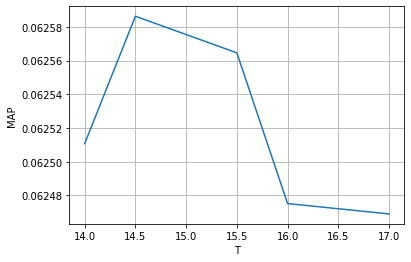

In [96]:
fig, ax = plt.subplots()
ax.plot(trials, MAPS)

ax.set(xlabel='T', ylabel='MAP')
ax.grid()
plt.show()

In [97]:
w5 = 14.5

# FINAL FIT

In [102]:
only_URM = {
    "URM_train" : URM_all
}

cython = {
    "URM_train" : URM_all,
    "recompile_cython" : False,
    "verbose" : False
}

also_ICM = {
    "URM_train" : URM_all,
    "ICM" : ICM_all
}

inits = [
    only_URM,only_URM,also_ICM, also_ICM, only_URM, cython
]
fits = [userknn,itemknn, uicm, iicm,alpha, cy]


In [103]:


recommender = WeightedHybridScoreRecommender(URM_all, recs, inits)

weights = [1,w1,w2,w3,w4,w5]
recommender.fit(fits,weights)



WeightedHybridScoreRecommender: URM Detected 1079 (4.15 %) cold items.
ItemKNNCFRecommender: URM Detected 1079 (4.15 %) cold items.
UserKNNCFRecommender: URM Detected 1079 (4.15 %) cold items.
UserKNNCFRecommender: URM Detected 1079 (4.15 %) cold items.
UserKNNCFRecommender: URM Detected 14 (0.07 %) cold items.
ItemKNNCFRecommender: URM Detected 1079 (4.15 %) cold items.
ItemKNNCFRecommender: URM Detected 2 (0.01 %) cold users.
ItemKNNCFRecommender: URM Detected 25 (0.10 %) cold items.
P3alphaRecommender: URM Detected 1079 (4.15 %) cold items.
--------FITTING IN PROGRESS...-------
Similarity column 25975 ( 100 % ), 4070.32 column/sec, elapsed time 0.11 min
Similarity column 7947 ( 100 % ), 10519.37 column/sec, elapsed time 0.01 min
Similarity column 7947 ( 100 % ), 11211.62 column/sec, elapsed time 0.01 min
Similarity column 7947 ( 100 % ), 1913.99 column/sec, elapsed time 0.07 min
Similarity column 25975 ( 100 % ), 4789.09 column/sec, elapsed time 0.09 min
Similarity column 25975 ( 10

SLIM_BPR_Recommender: Epoch 116 of 1904. Elapsed time 6.08 sec
SLIM_BPR_Recommender: Epoch 117 of 1904. Elapsed time 6.14 sec
SLIM_BPR_Recommender: Epoch 118 of 1904. Elapsed time 6.21 sec
SLIM_BPR_Recommender: Epoch 119 of 1904. Elapsed time 6.27 sec
SLIM_BPR_Recommender: Epoch 120 of 1904. Elapsed time 6.33 sec
SLIM_BPR_Recommender: Epoch 121 of 1904. Elapsed time 6.38 sec
SLIM_BPR_Recommender: Epoch 122 of 1904. Elapsed time 6.44 sec
SLIM_BPR_Recommender: Epoch 123 of 1904. Elapsed time 6.48 sec
SLIM_BPR_Recommender: Epoch 124 of 1904. Elapsed time 6.52 sec
SLIM_BPR_Recommender: Epoch 125 of 1904. Elapsed time 6.56 sec
SLIM_BPR_Recommender: Epoch 126 of 1904. Elapsed time 6.60 sec
SLIM_BPR_Recommender: Epoch 127 of 1904. Elapsed time 6.64 sec
SLIM_BPR_Recommender: Epoch 128 of 1904. Elapsed time 6.68 sec
SLIM_BPR_Recommender: Epoch 129 of 1904. Elapsed time 6.72 sec
SLIM_BPR_Recommender: Epoch 130 of 1904. Elapsed time 6.76 sec
SLIM_BPR_Recommender: Epoch 131 of 1904. Elapsed time 6

SLIM_BPR_Recommender: Epoch 374 of 1904. Elapsed time 14.78 sec
SLIM_BPR_Recommender: Epoch 375 of 1904. Elapsed time 14.81 sec
SLIM_BPR_Recommender: Epoch 376 of 1904. Elapsed time 14.84 sec
SLIM_BPR_Recommender: Epoch 377 of 1904. Elapsed time 14.87 sec
SLIM_BPR_Recommender: Epoch 378 of 1904. Elapsed time 14.90 sec
SLIM_BPR_Recommender: Epoch 379 of 1904. Elapsed time 14.93 sec
SLIM_BPR_Recommender: Epoch 380 of 1904. Elapsed time 14.96 sec
SLIM_BPR_Recommender: Epoch 381 of 1904. Elapsed time 14.99 sec
SLIM_BPR_Recommender: Epoch 382 of 1904. Elapsed time 15.02 sec
SLIM_BPR_Recommender: Epoch 383 of 1904. Elapsed time 15.05 sec
SLIM_BPR_Recommender: Epoch 384 of 1904. Elapsed time 15.09 sec
SLIM_BPR_Recommender: Epoch 385 of 1904. Elapsed time 15.12 sec
SLIM_BPR_Recommender: Epoch 386 of 1904. Elapsed time 15.16 sec
SLIM_BPR_Recommender: Epoch 387 of 1904. Elapsed time 15.18 sec
SLIM_BPR_Recommender: Epoch 388 of 1904. Elapsed time 15.21 sec
SLIM_BPR_Recommender: Epoch 389 of 1904.

SLIM_BPR_Recommender: Epoch 503 of 1904. Elapsed time 20.32 sec
SLIM_BPR_Recommender: Epoch 504 of 1904. Elapsed time 20.35 sec
SLIM_BPR_Recommender: Epoch 505 of 1904. Elapsed time 20.38 sec
SLIM_BPR_Recommender: Epoch 506 of 1904. Elapsed time 20.42 sec
SLIM_BPR_Recommender: Epoch 507 of 1904. Elapsed time 20.45 sec
SLIM_BPR_Recommender: Epoch 508 of 1904. Elapsed time 20.48 sec
SLIM_BPR_Recommender: Epoch 509 of 1904. Elapsed time 20.51 sec
SLIM_BPR_Recommender: Epoch 510 of 1904. Elapsed time 20.54 sec
SLIM_BPR_Recommender: Epoch 511 of 1904. Elapsed time 20.57 sec
SLIM_BPR_Recommender: Epoch 512 of 1904. Elapsed time 20.60 sec
SLIM_BPR_Recommender: Epoch 513 of 1904. Elapsed time 20.63 sec
SLIM_BPR_Recommender: Epoch 514 of 1904. Elapsed time 20.67 sec
SLIM_BPR_Recommender: Epoch 515 of 1904. Elapsed time 20.70 sec
SLIM_BPR_Recommender: Epoch 516 of 1904. Elapsed time 20.73 sec
SLIM_BPR_Recommender: Epoch 517 of 1904. Elapsed time 20.76 sec
SLIM_BPR_Recommender: Epoch 518 of 1904.

SLIM_BPR_Recommender: Epoch 632 of 1904. Elapsed time 24.39 sec
SLIM_BPR_Recommender: Epoch 633 of 1904. Elapsed time 24.42 sec
SLIM_BPR_Recommender: Epoch 634 of 1904. Elapsed time 24.46 sec
SLIM_BPR_Recommender: Epoch 635 of 1904. Elapsed time 24.48 sec
SLIM_BPR_Recommender: Epoch 636 of 1904. Elapsed time 24.51 sec
SLIM_BPR_Recommender: Epoch 637 of 1904. Elapsed time 24.54 sec
SLIM_BPR_Recommender: Epoch 638 of 1904. Elapsed time 24.57 sec
SLIM_BPR_Recommender: Epoch 639 of 1904. Elapsed time 24.60 sec
SLIM_BPR_Recommender: Epoch 640 of 1904. Elapsed time 24.64 sec
SLIM_BPR_Recommender: Epoch 641 of 1904. Elapsed time 24.67 sec
SLIM_BPR_Recommender: Epoch 642 of 1904. Elapsed time 24.70 sec
SLIM_BPR_Recommender: Epoch 643 of 1904. Elapsed time 24.73 sec
SLIM_BPR_Recommender: Epoch 644 of 1904. Elapsed time 24.76 sec
SLIM_BPR_Recommender: Epoch 645 of 1904. Elapsed time 24.80 sec
SLIM_BPR_Recommender: Epoch 646 of 1904. Elapsed time 24.83 sec
SLIM_BPR_Recommender: Epoch 647 of 1904.

SLIM_BPR_Recommender: Epoch 761 of 1904. Elapsed time 29.79 sec
SLIM_BPR_Recommender: Epoch 762 of 1904. Elapsed time 29.83 sec
SLIM_BPR_Recommender: Epoch 763 of 1904. Elapsed time 29.85 sec
SLIM_BPR_Recommender: Epoch 764 of 1904. Elapsed time 29.89 sec
SLIM_BPR_Recommender: Epoch 765 of 1904. Elapsed time 29.92 sec
SLIM_BPR_Recommender: Epoch 766 of 1904. Elapsed time 29.95 sec
SLIM_BPR_Recommender: Epoch 767 of 1904. Elapsed time 29.97 sec
SLIM_BPR_Recommender: Epoch 768 of 1904. Elapsed time 30.00 sec
SLIM_BPR_Recommender: Epoch 769 of 1904. Elapsed time 30.03 sec
SLIM_BPR_Recommender: Epoch 770 of 1904. Elapsed time 30.07 sec
SLIM_BPR_Recommender: Epoch 771 of 1904. Elapsed time 30.10 sec
SLIM_BPR_Recommender: Epoch 772 of 1904. Elapsed time 30.13 sec
SLIM_BPR_Recommender: Epoch 773 of 1904. Elapsed time 30.16 sec
SLIM_BPR_Recommender: Epoch 774 of 1904. Elapsed time 30.19 sec
SLIM_BPR_Recommender: Epoch 775 of 1904. Elapsed time 30.22 sec
SLIM_BPR_Recommender: Epoch 776 of 1904.

SLIM_BPR_Recommender: Epoch 890 of 1904. Elapsed time 33.70 sec
SLIM_BPR_Recommender: Epoch 891 of 1904. Elapsed time 33.73 sec
SLIM_BPR_Recommender: Epoch 892 of 1904. Elapsed time 33.76 sec
SLIM_BPR_Recommender: Epoch 893 of 1904. Elapsed time 33.79 sec
SLIM_BPR_Recommender: Epoch 894 of 1904. Elapsed time 33.82 sec
SLIM_BPR_Recommender: Epoch 895 of 1904. Elapsed time 33.86 sec
SLIM_BPR_Recommender: Epoch 896 of 1904. Elapsed time 33.89 sec
SLIM_BPR_Recommender: Epoch 897 of 1904. Elapsed time 33.92 sec
SLIM_BPR_Recommender: Epoch 898 of 1904. Elapsed time 33.95 sec
SLIM_BPR_Recommender: Epoch 899 of 1904. Elapsed time 33.98 sec
SLIM_BPR_Recommender: Epoch 900 of 1904. Elapsed time 34.01 sec
SLIM_BPR_Recommender: Epoch 901 of 1904. Elapsed time 34.04 sec
SLIM_BPR_Recommender: Epoch 902 of 1904. Elapsed time 34.08 sec
SLIM_BPR_Recommender: Epoch 903 of 1904. Elapsed time 34.11 sec
SLIM_BPR_Recommender: Epoch 904 of 1904. Elapsed time 34.15 sec
SLIM_BPR_Recommender: Epoch 905 of 1904.

SLIM_BPR_Recommender: Epoch 1018 of 1904. Elapsed time 38.56 sec
SLIM_BPR_Recommender: Epoch 1019 of 1904. Elapsed time 38.59 sec
SLIM_BPR_Recommender: Epoch 1020 of 1904. Elapsed time 38.62 sec
SLIM_BPR_Recommender: Epoch 1021 of 1904. Elapsed time 38.65 sec
SLIM_BPR_Recommender: Epoch 1022 of 1904. Elapsed time 38.69 sec
SLIM_BPR_Recommender: Epoch 1023 of 1904. Elapsed time 38.71 sec
SLIM_BPR_Recommender: Epoch 1024 of 1904. Elapsed time 38.75 sec
SLIM_BPR_Recommender: Epoch 1025 of 1904. Elapsed time 38.78 sec
SLIM_BPR_Recommender: Epoch 1026 of 1904. Elapsed time 38.81 sec
SLIM_BPR_Recommender: Epoch 1027 of 1904. Elapsed time 38.83 sec
SLIM_BPR_Recommender: Epoch 1028 of 1904. Elapsed time 38.86 sec
SLIM_BPR_Recommender: Epoch 1029 of 1904. Elapsed time 38.89 sec
SLIM_BPR_Recommender: Epoch 1030 of 1904. Elapsed time 38.92 sec
SLIM_BPR_Recommender: Epoch 1031 of 1904. Elapsed time 38.95 sec
SLIM_BPR_Recommender: Epoch 1032 of 1904. Elapsed time 38.99 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1145 of 1904. Elapsed time 42.46 sec
SLIM_BPR_Recommender: Epoch 1146 of 1904. Elapsed time 42.50 sec
SLIM_BPR_Recommender: Epoch 1147 of 1904. Elapsed time 42.52 sec
SLIM_BPR_Recommender: Epoch 1148 of 1904. Elapsed time 42.55 sec
SLIM_BPR_Recommender: Epoch 1149 of 1904. Elapsed time 42.58 sec
SLIM_BPR_Recommender: Epoch 1150 of 1904. Elapsed time 42.61 sec
SLIM_BPR_Recommender: Epoch 1151 of 1904. Elapsed time 42.64 sec
SLIM_BPR_Recommender: Epoch 1152 of 1904. Elapsed time 42.67 sec
SLIM_BPR_Recommender: Epoch 1153 of 1904. Elapsed time 42.70 sec
SLIM_BPR_Recommender: Epoch 1154 of 1904. Elapsed time 42.73 sec
SLIM_BPR_Recommender: Epoch 1155 of 1904. Elapsed time 42.76 sec
SLIM_BPR_Recommender: Epoch 1156 of 1904. Elapsed time 42.79 sec
SLIM_BPR_Recommender: Epoch 1157 of 1904. Elapsed time 42.82 sec
SLIM_BPR_Recommender: Epoch 1158 of 1904. Elapsed time 42.85 sec
SLIM_BPR_Recommender: Epoch 1159 of 1904. Elapsed time 42.88 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1398 of 1904. Elapsed time 51.00 sec
SLIM_BPR_Recommender: Epoch 1399 of 1904. Elapsed time 51.04 sec
SLIM_BPR_Recommender: Epoch 1400 of 1904. Elapsed time 51.07 sec
SLIM_BPR_Recommender: Epoch 1401 of 1904. Elapsed time 51.10 sec
SLIM_BPR_Recommender: Epoch 1402 of 1904. Elapsed time 51.13 sec
SLIM_BPR_Recommender: Epoch 1403 of 1904. Elapsed time 51.17 sec
SLIM_BPR_Recommender: Epoch 1404 of 1904. Elapsed time 51.20 sec
SLIM_BPR_Recommender: Epoch 1405 of 1904. Elapsed time 51.23 sec
SLIM_BPR_Recommender: Epoch 1406 of 1904. Elapsed time 51.27 sec
SLIM_BPR_Recommender: Epoch 1407 of 1904. Elapsed time 51.30 sec
SLIM_BPR_Recommender: Epoch 1408 of 1904. Elapsed time 51.33 sec
SLIM_BPR_Recommender: Epoch 1409 of 1904. Elapsed time 51.37 sec
SLIM_BPR_Recommender: Epoch 1410 of 1904. Elapsed time 51.40 sec
SLIM_BPR_Recommender: Epoch 1411 of 1904. Elapsed time 51.44 sec
SLIM_BPR_Recommender: Epoch 1412 of 1904. Elapsed time 51.48 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1525 of 1904. Elapsed time 55.11 sec
SLIM_BPR_Recommender: Epoch 1526 of 1904. Elapsed time 55.14 sec
SLIM_BPR_Recommender: Epoch 1527 of 1904. Elapsed time 55.17 sec
SLIM_BPR_Recommender: Epoch 1528 of 1904. Elapsed time 55.20 sec
SLIM_BPR_Recommender: Epoch 1529 of 1904. Elapsed time 55.23 sec
SLIM_BPR_Recommender: Epoch 1530 of 1904. Elapsed time 55.26 sec
SLIM_BPR_Recommender: Epoch 1531 of 1904. Elapsed time 55.29 sec
SLIM_BPR_Recommender: Epoch 1532 of 1904. Elapsed time 55.32 sec
SLIM_BPR_Recommender: Epoch 1533 of 1904. Elapsed time 55.35 sec
SLIM_BPR_Recommender: Epoch 1534 of 1904. Elapsed time 55.39 sec
SLIM_BPR_Recommender: Epoch 1535 of 1904. Elapsed time 55.42 sec
SLIM_BPR_Recommender: Epoch 1536 of 1904. Elapsed time 55.46 sec
SLIM_BPR_Recommender: Epoch 1537 of 1904. Elapsed time 55.49 sec
SLIM_BPR_Recommender: Epoch 1538 of 1904. Elapsed time 55.52 sec
SLIM_BPR_Recommender: Epoch 1539 of 1904. Elapsed time 55.56 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1652 of 1904. Elapsed time 58.98 sec
SLIM_BPR_Recommender: Epoch 1653 of 1904. Elapsed time 59.00 sec
SLIM_BPR_Recommender: Epoch 1654 of 1904. Elapsed time 59.02 sec
SLIM_BPR_Recommender: Epoch 1655 of 1904. Elapsed time 59.05 sec
SLIM_BPR_Recommender: Epoch 1656 of 1904. Elapsed time 59.07 sec
SLIM_BPR_Recommender: Epoch 1657 of 1904. Elapsed time 59.10 sec
SLIM_BPR_Recommender: Epoch 1658 of 1904. Elapsed time 59.12 sec
SLIM_BPR_Recommender: Epoch 1659 of 1904. Elapsed time 59.15 sec
SLIM_BPR_Recommender: Epoch 1660 of 1904. Elapsed time 59.17 sec
SLIM_BPR_Recommender: Epoch 1661 of 1904. Elapsed time 59.20 sec
SLIM_BPR_Recommender: Epoch 1662 of 1904. Elapsed time 59.23 sec
SLIM_BPR_Recommender: Epoch 1663 of 1904. Elapsed time 59.25 sec
SLIM_BPR_Recommender: Epoch 1664 of 1904. Elapsed time 59.28 sec
SLIM_BPR_Recommender: Epoch 1665 of 1904. Elapsed time 59.30 sec
SLIM_BPR_Recommender: Epoch 1666 of 1904. Elapsed time 59.32 sec
SLIM_BPR_Recommender: Epo

SLIM_BPR_Recommender: Epoch 1780 of 1904. Elapsed time 1.08 min
SLIM_BPR_Recommender: Epoch 1781 of 1904. Elapsed time 1.08 min
SLIM_BPR_Recommender: Epoch 1782 of 1904. Elapsed time 1.08 min
SLIM_BPR_Recommender: Epoch 1783 of 1904. Elapsed time 1.08 min
SLIM_BPR_Recommender: Epoch 1784 of 1904. Elapsed time 1.08 min
SLIM_BPR_Recommender: Epoch 1785 of 1904. Elapsed time 1.08 min
SLIM_BPR_Recommender: Epoch 1786 of 1904. Elapsed time 1.08 min
SLIM_BPR_Recommender: Epoch 1787 of 1904. Elapsed time 1.08 min
SLIM_BPR_Recommender: Epoch 1788 of 1904. Elapsed time 1.09 min
SLIM_BPR_Recommender: Epoch 1789 of 1904. Elapsed time 1.09 min
SLIM_BPR_Recommender: Epoch 1790 of 1904. Elapsed time 1.09 min
SLIM_BPR_Recommender: Epoch 1791 of 1904. Elapsed time 1.09 min
SLIM_BPR_Recommender: Epoch 1792 of 1904. Elapsed time 1.09 min
SLIM_BPR_Recommender: Epoch 1793 of 1904. Elapsed time 1.09 min
SLIM_BPR_Recommender: Epoch 1794 of 1904. Elapsed time 1.09 min
SLIM_BPR_Recommender: Epoch 1795 of 1904

In [104]:
import time
URM_file = open(r"../datasets/data_target_users_test.csv", 'r')

URM_file.seek(0)
URM_tuples = []
URM_file.readline()#questa è importante di cristo c'è riga di introduzione
for line in URM_file:
    URM_tuples.append(int(line.replace("\n","")))

usersToPred = np.array(URM_tuples)

start_time = time.time()#BUONE METRICHE PER IL TEMPO QUI
import csv

with open('WWWWWWoutputProva.csv', mode='w',newline='') as recFile:
    
    recFile = csv.writer(recFile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    recFile.writerow(['user_id', 'item_list'])
    recs=recommender.recommend(usersToPred, cutoff=10)
    for user_id,rec in zip(usersToPred,recs):
        rec_string =' '.join(map(str, rec[:10]))
        recFile.writerow([user_id, rec_string])
    
end_time = time.time()
print("Ha finito in questo tempo: "+str(end_time-start_time)+" secondi")

Ha finito in questo tempo: 44.19127297401428 secondi
